IMPORT ALL DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

Get data and analyse it

In [10]:
df = pd.read_csv("/content/data.csv")
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

In [7]:
df.duplicated().sum()

np.int64(0)

Delete columns that have no use to us

In [11]:
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

Now, lets visualize data

M-Malignant, B-Benign

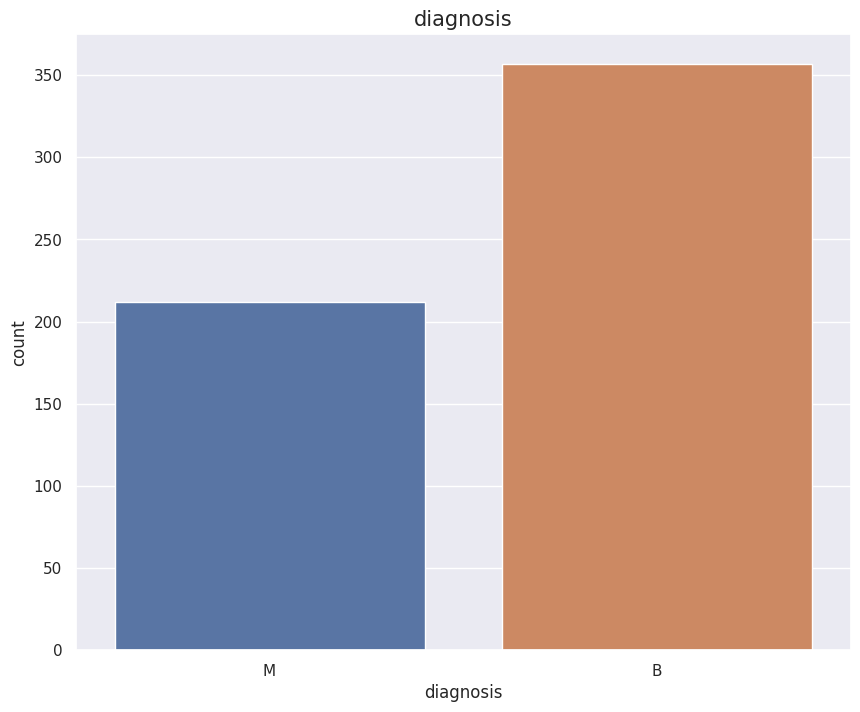

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(df, x="diagnosis", hue="diagnosis")
plt.title("diagnosis", size=15)
plt.show()

Let's visualize relation between mean of all parameters (first 10 columns)

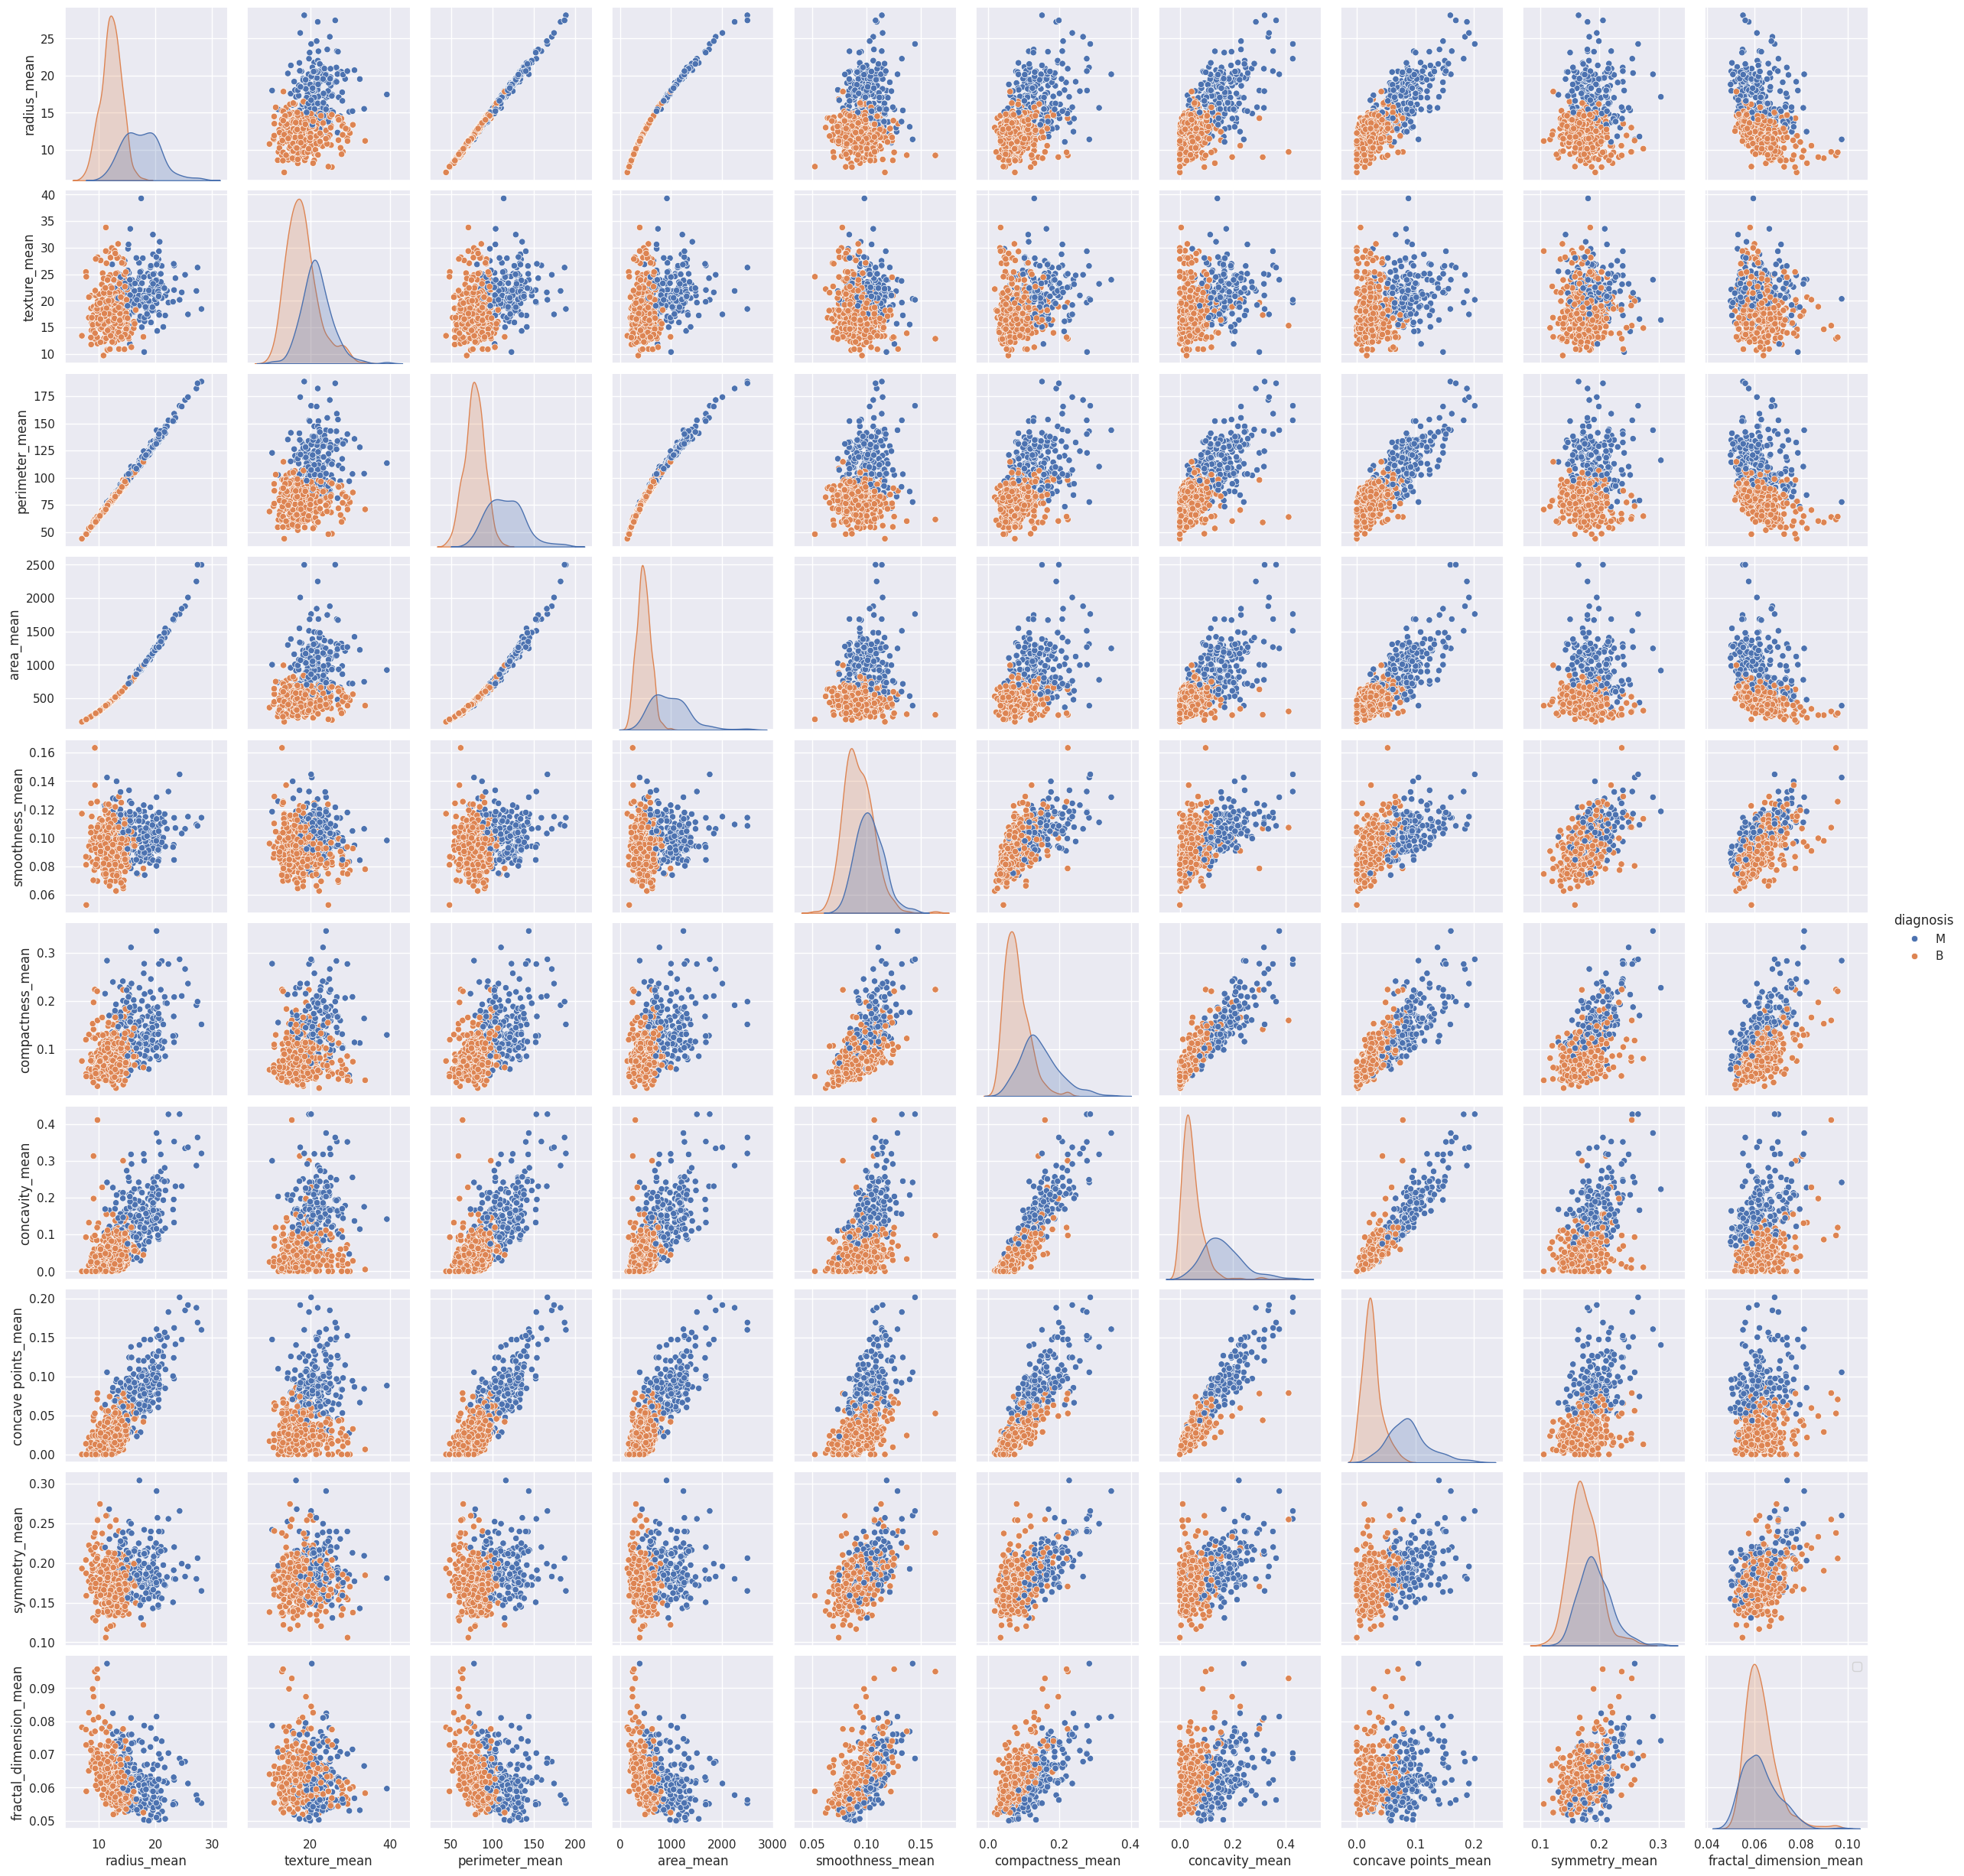

In [12]:
sns.set()

cols_to_pairplot = df.columns[:11]
sns.pairplot(df[cols_to_pairplot], hue="diagnosis")
plt.legend()
plt.show()

Plotting Values of each Variable

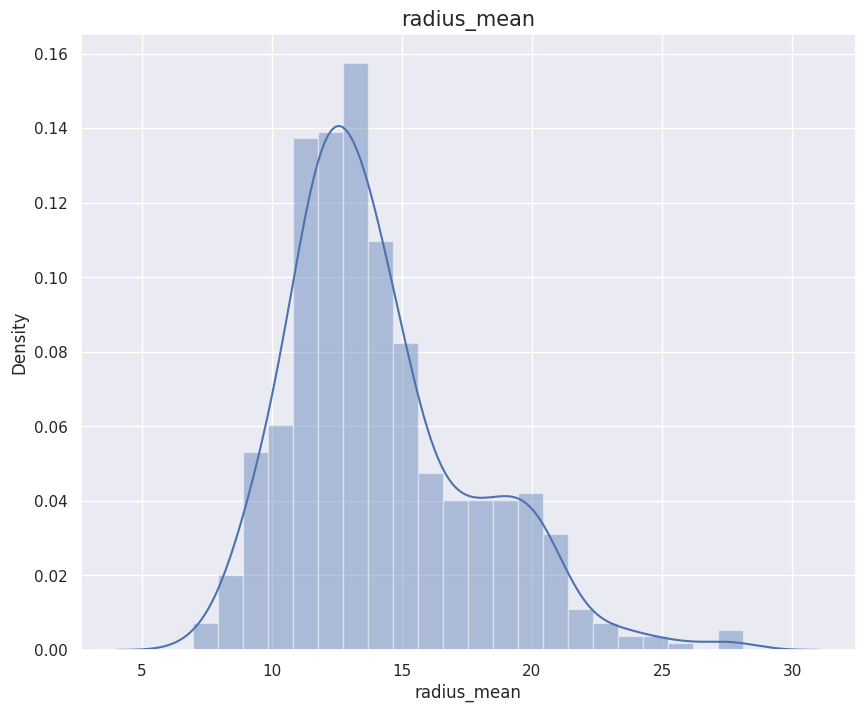

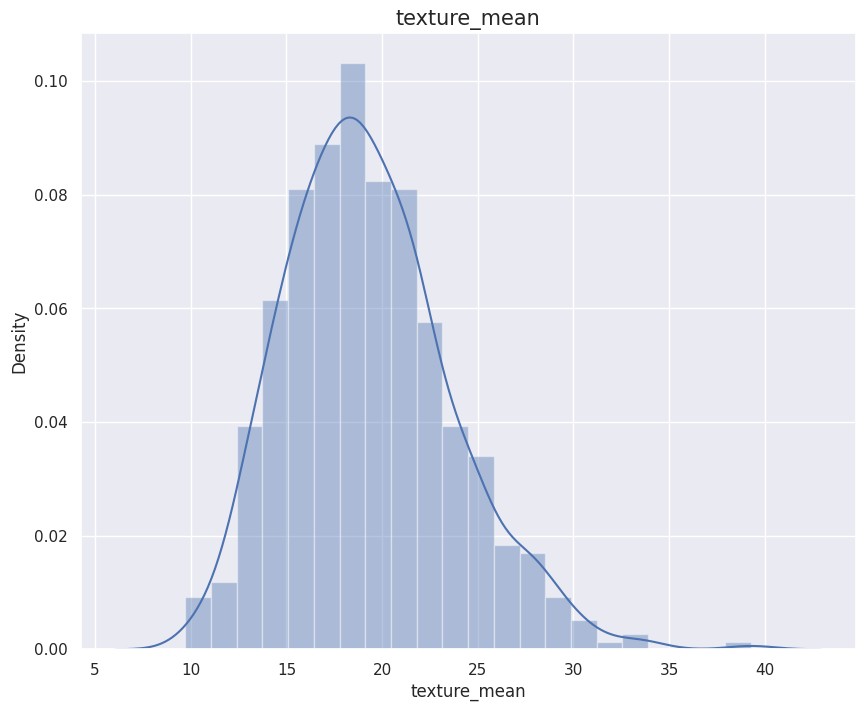

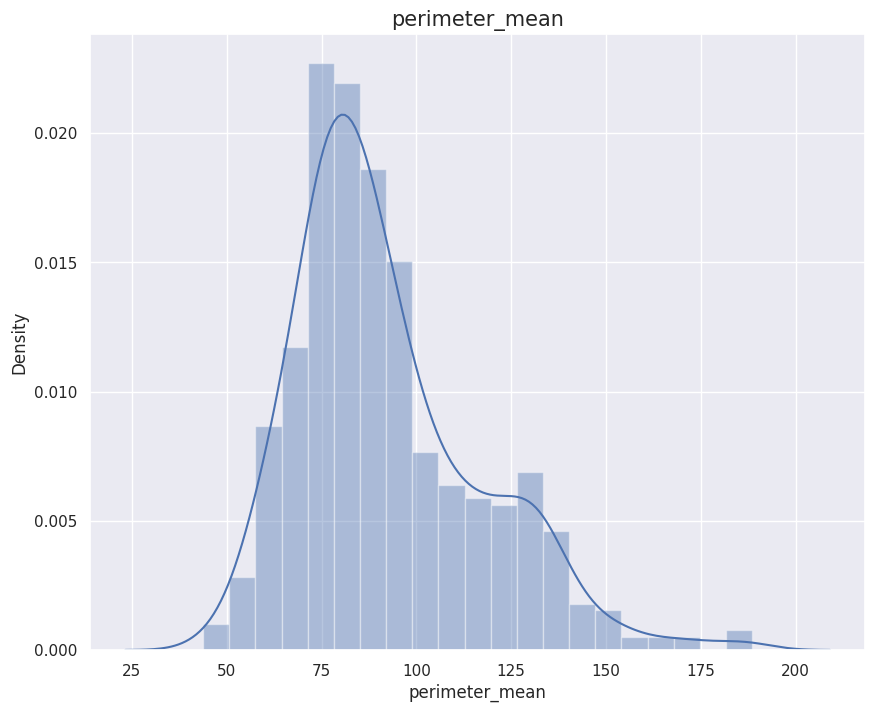

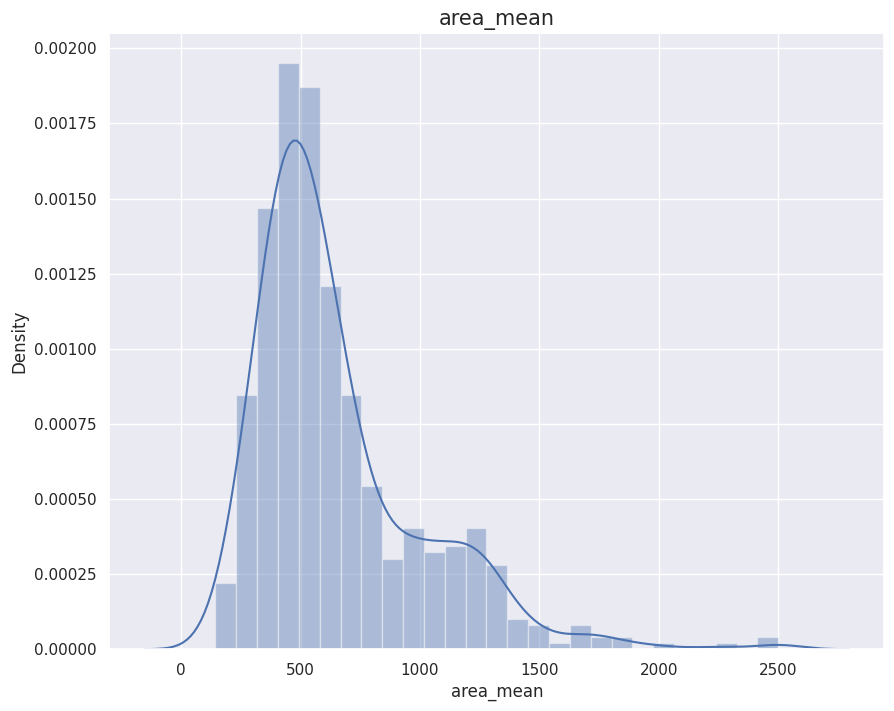

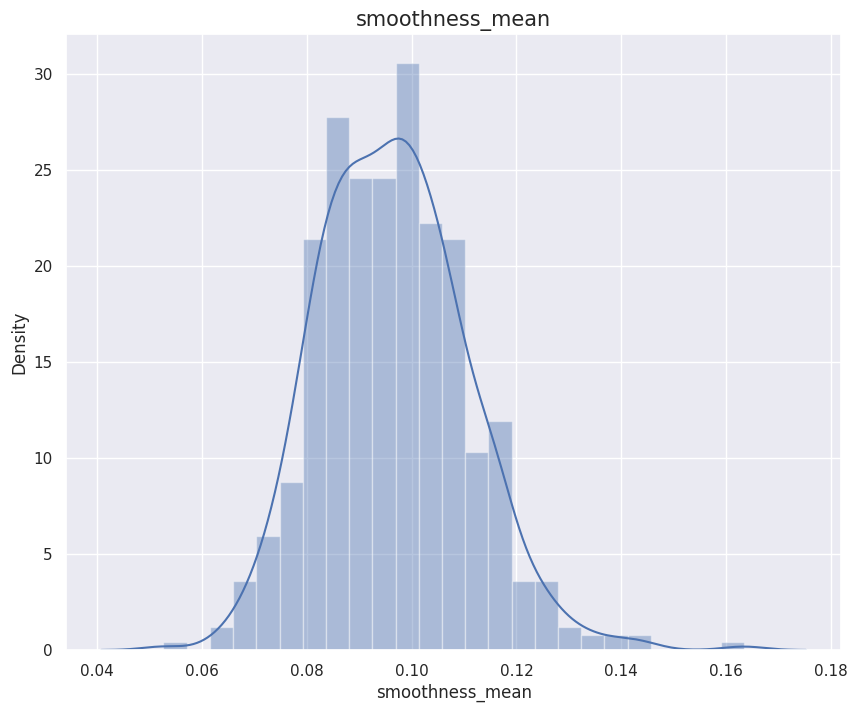

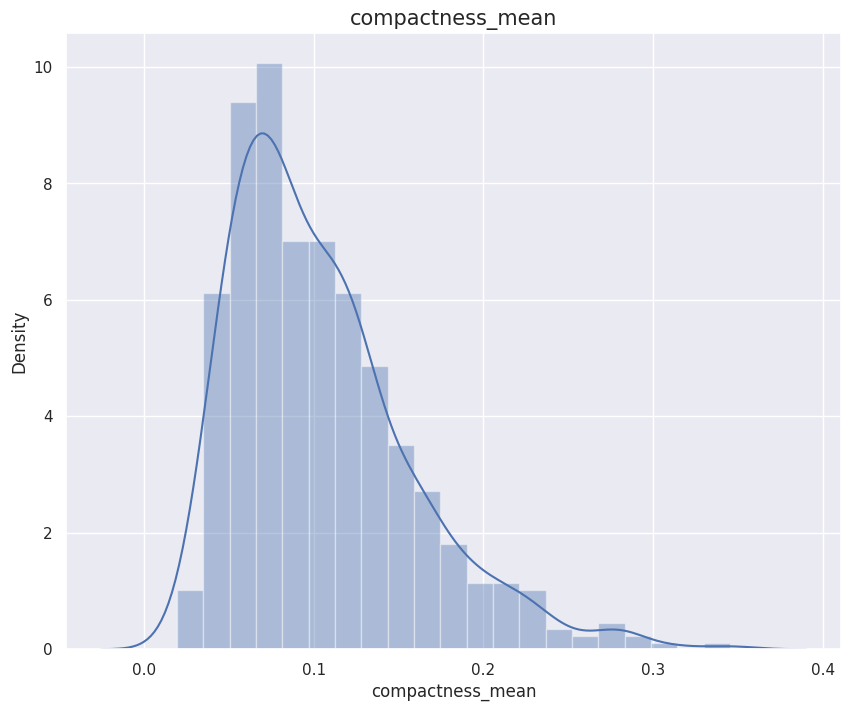

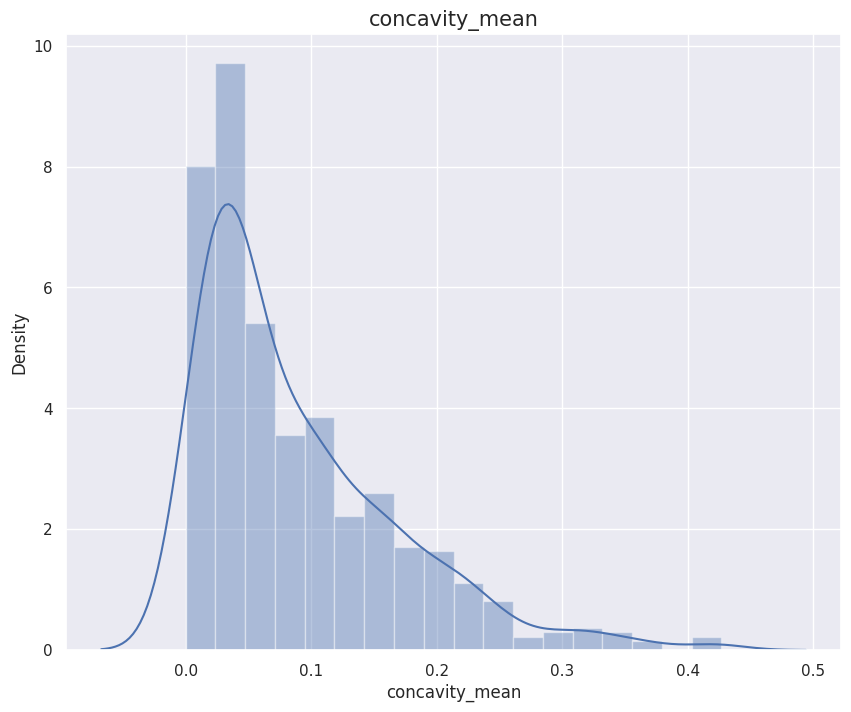

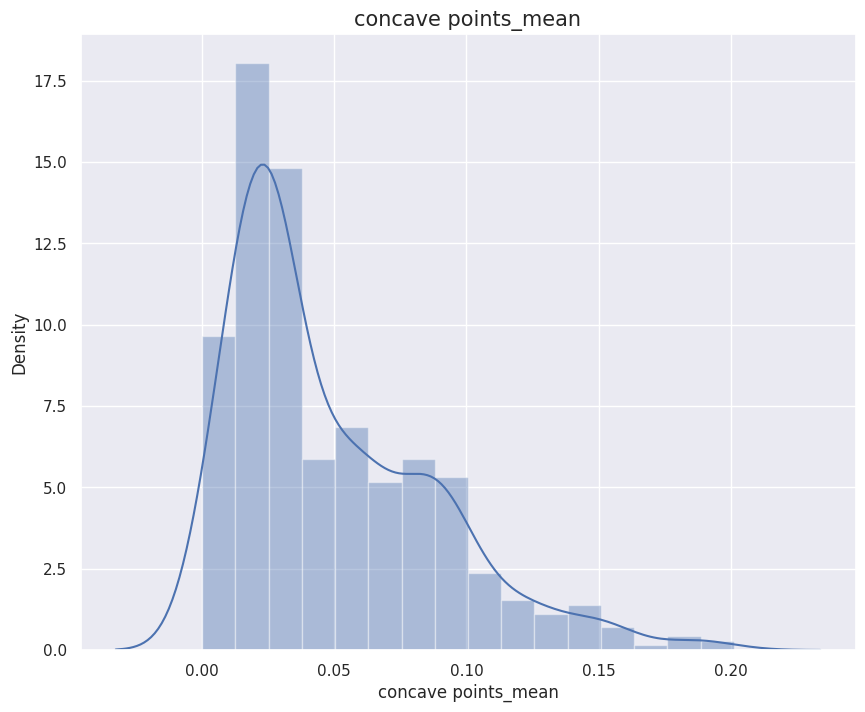

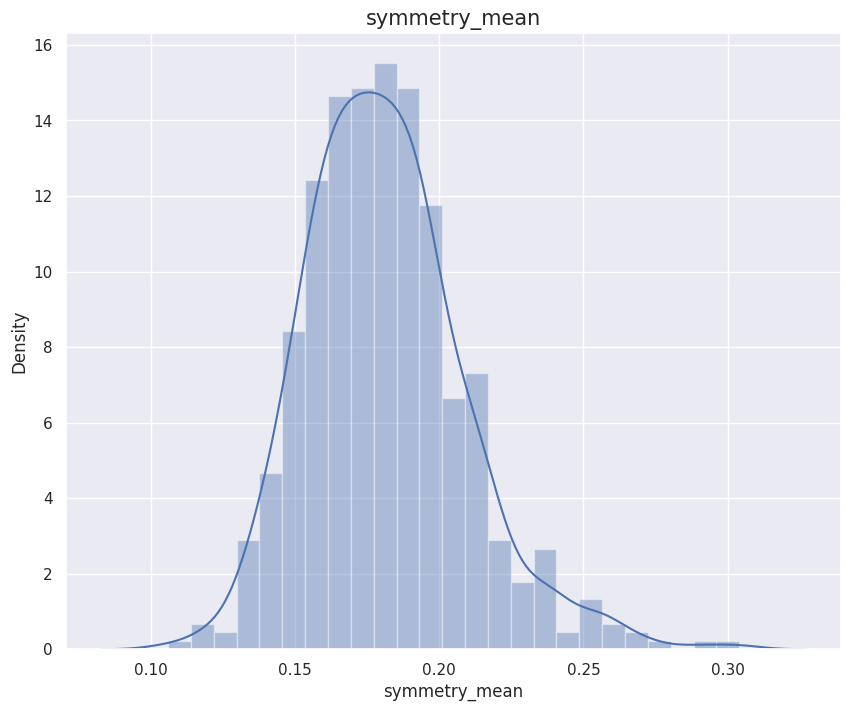

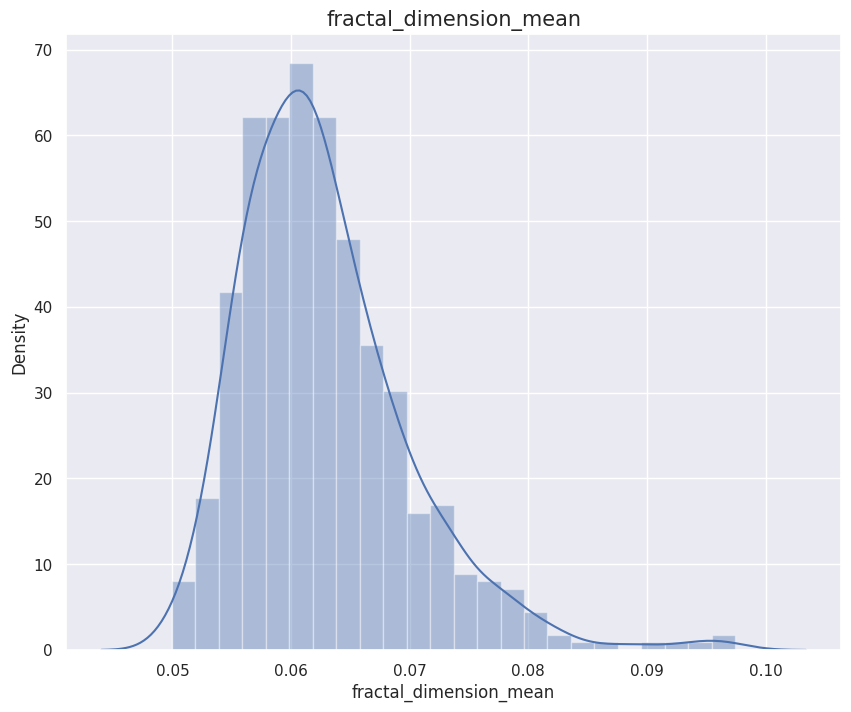

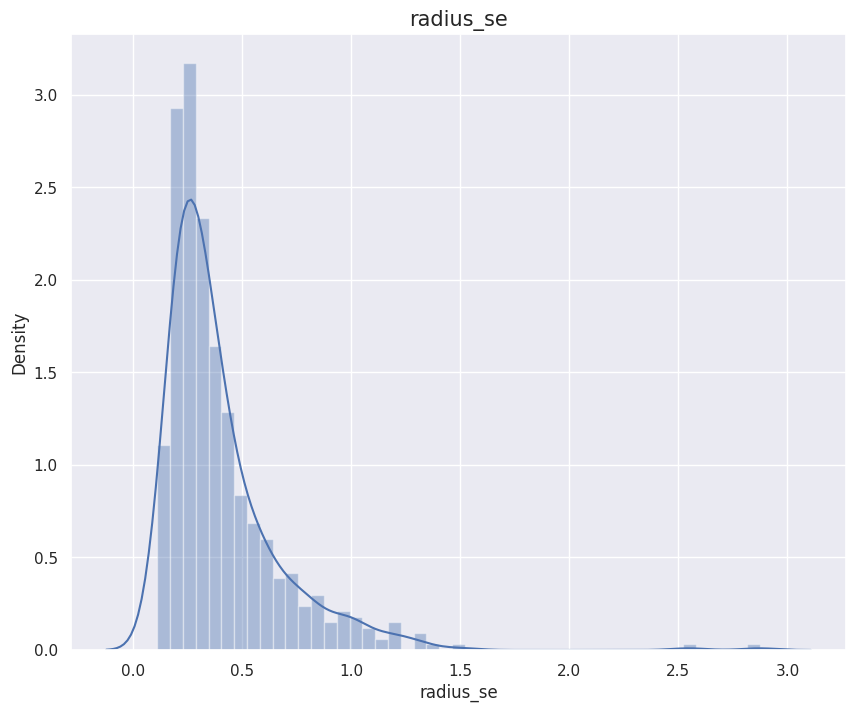

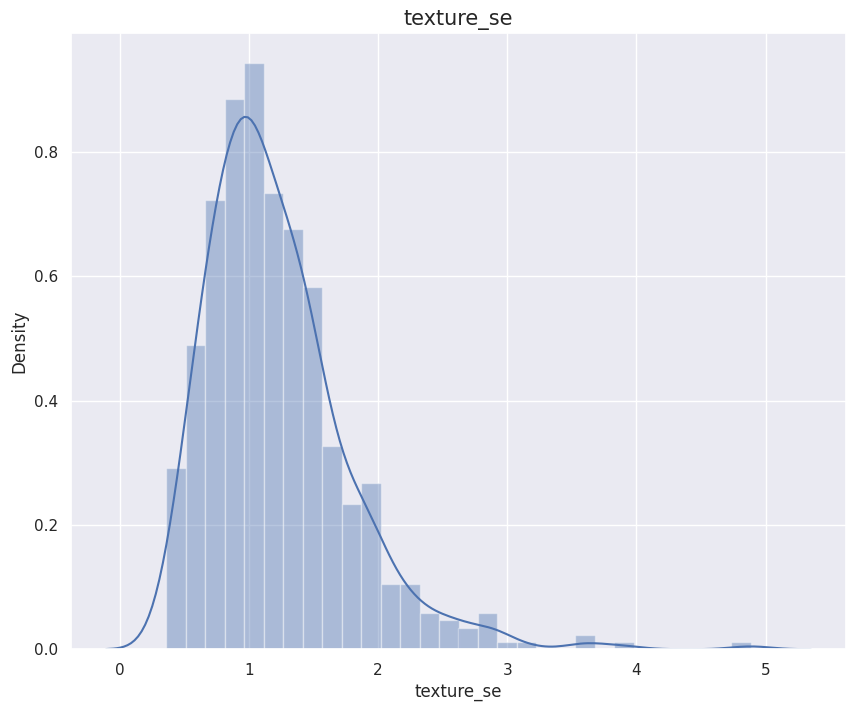

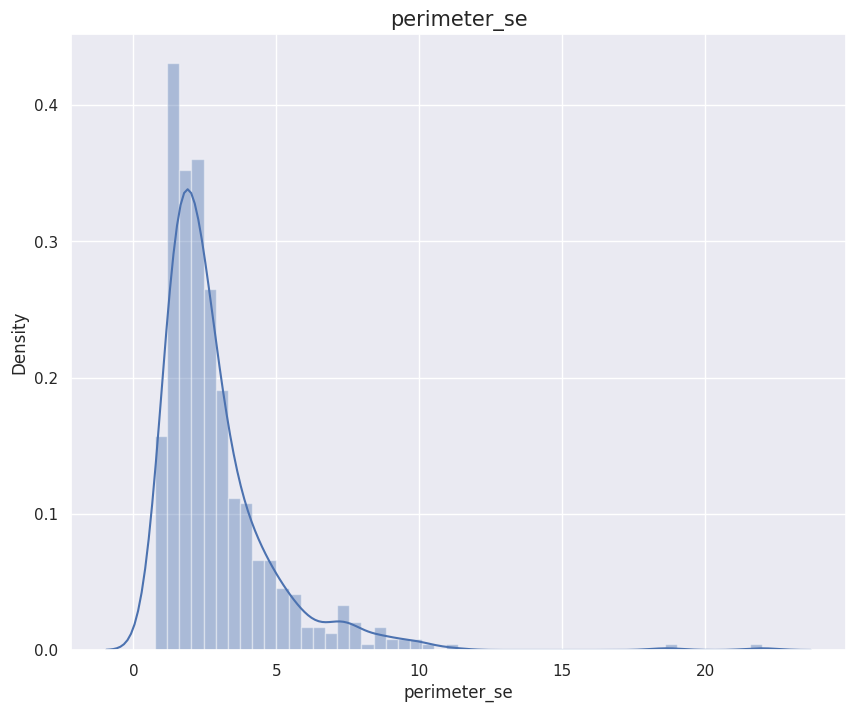

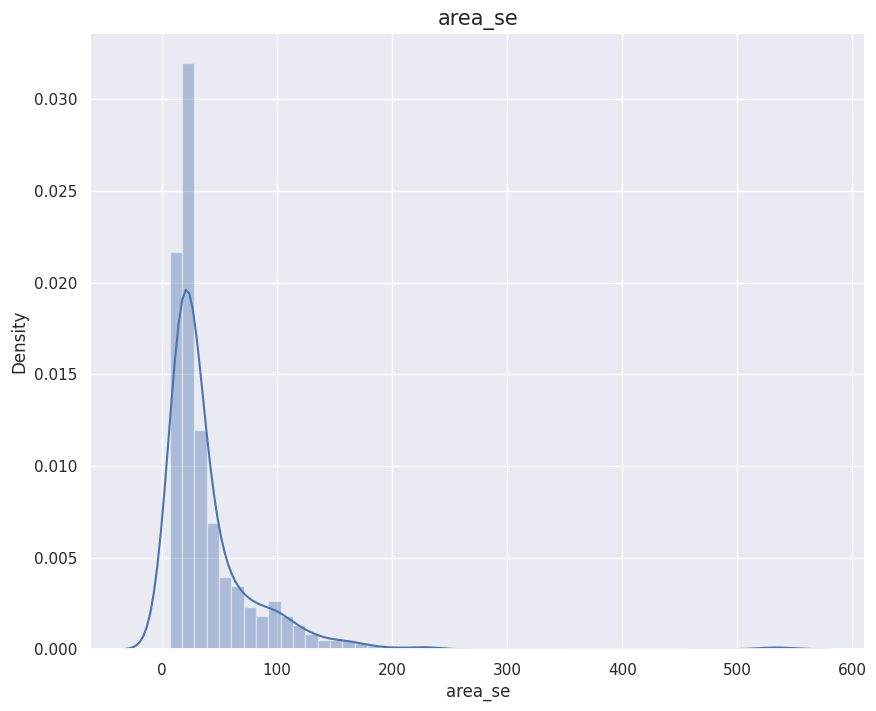

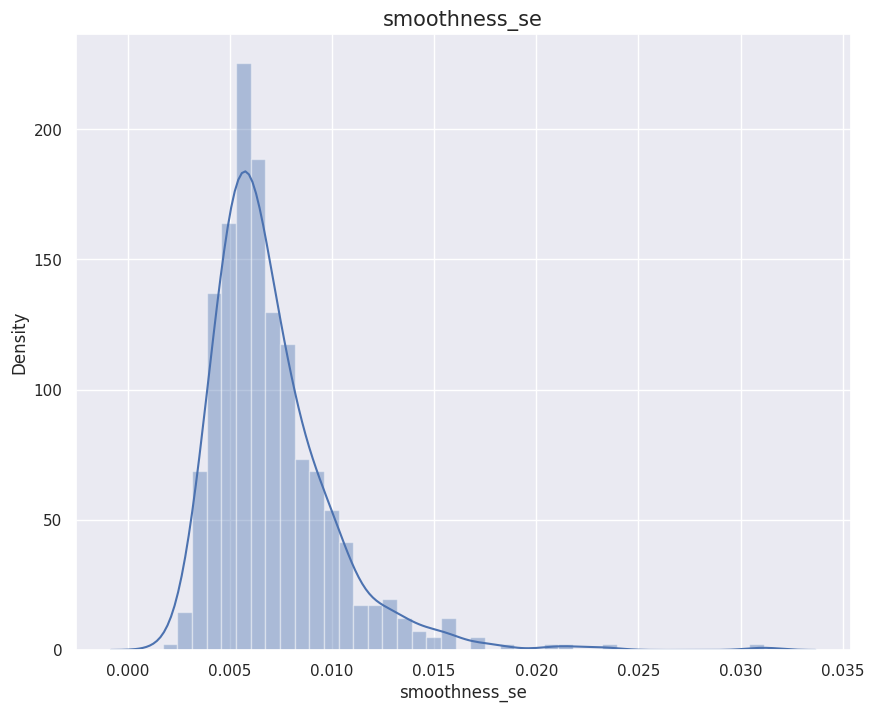

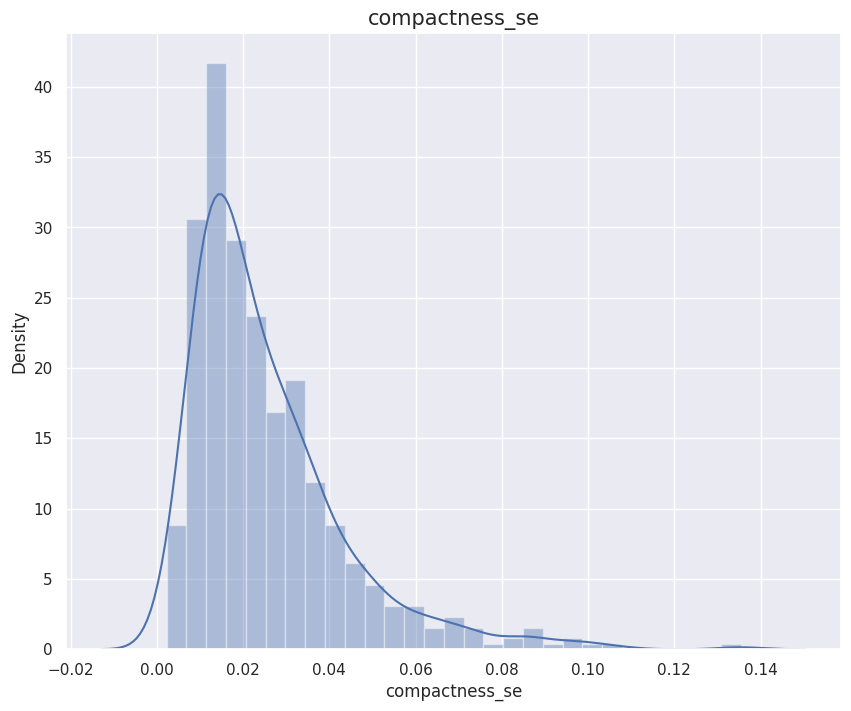

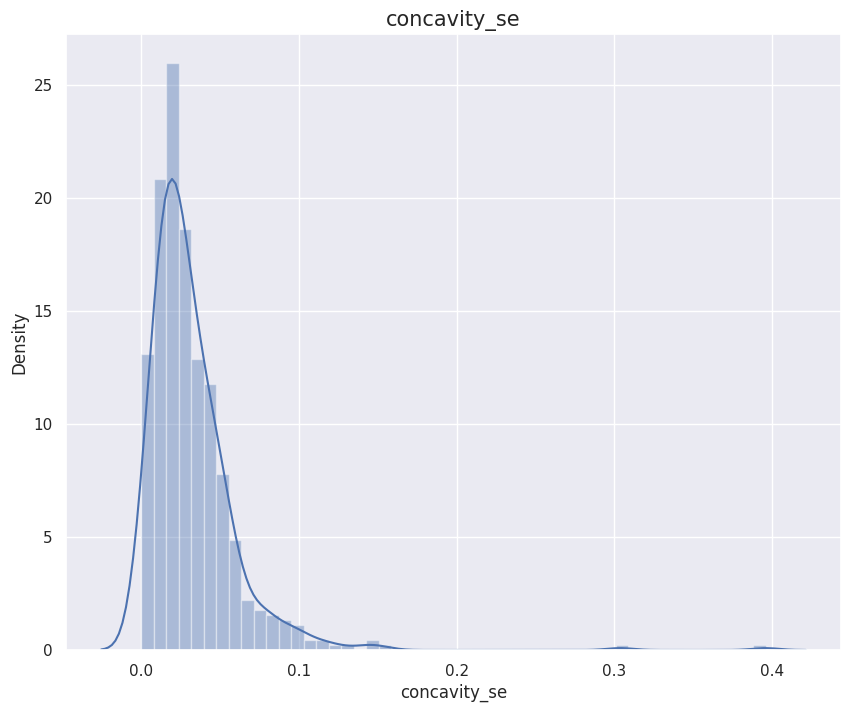

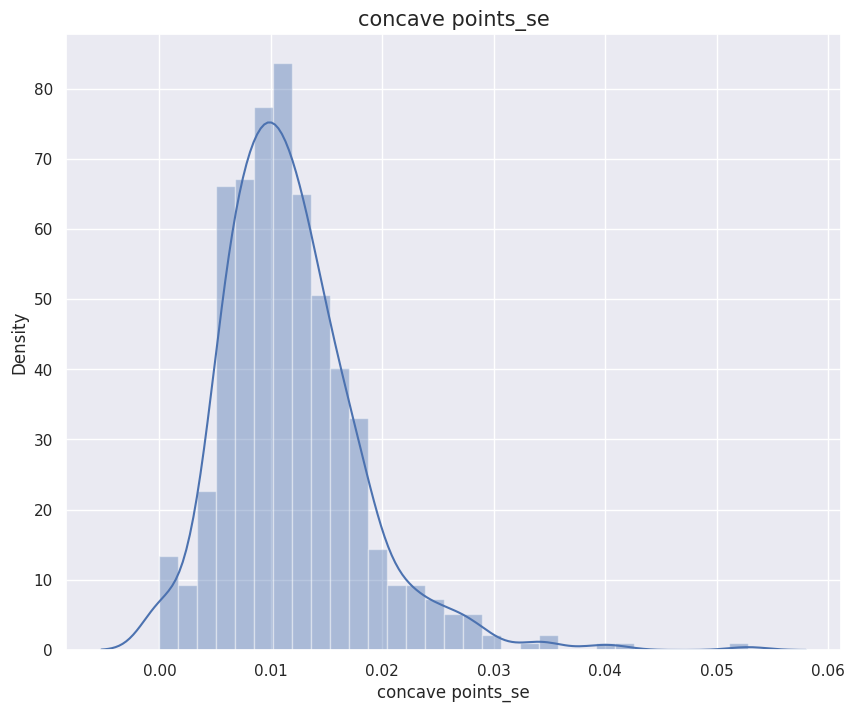

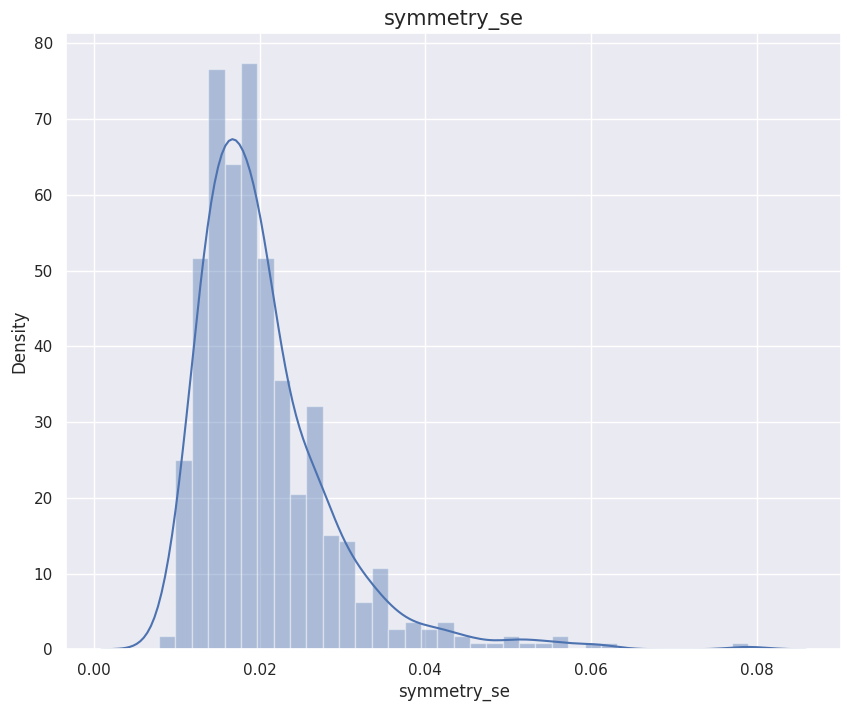

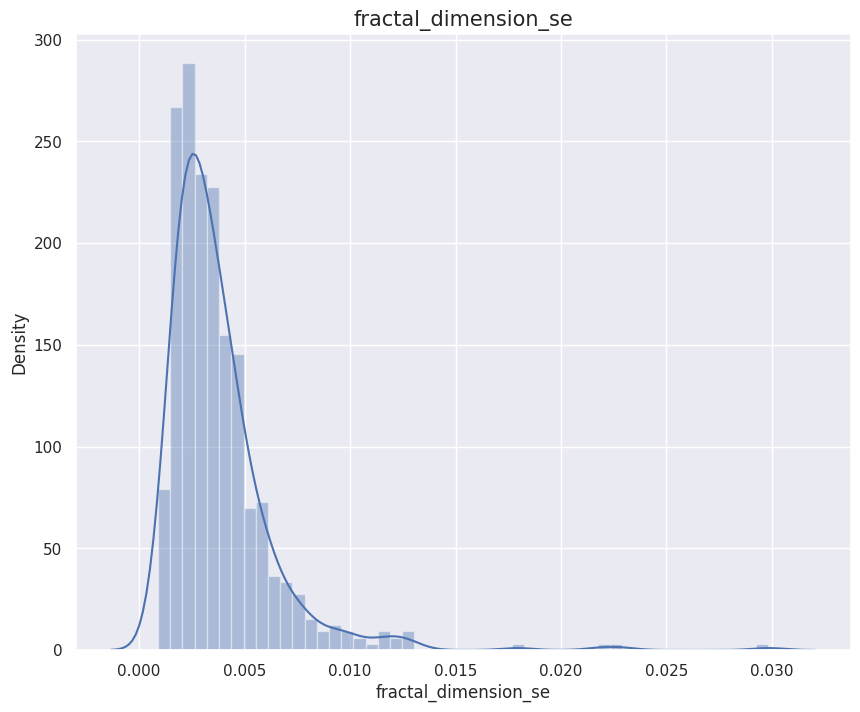

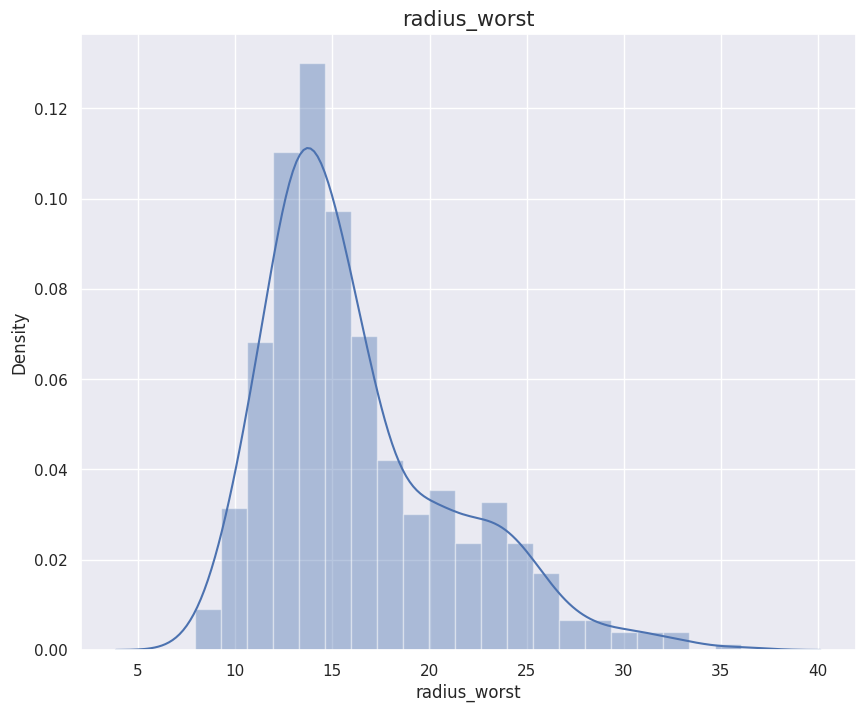

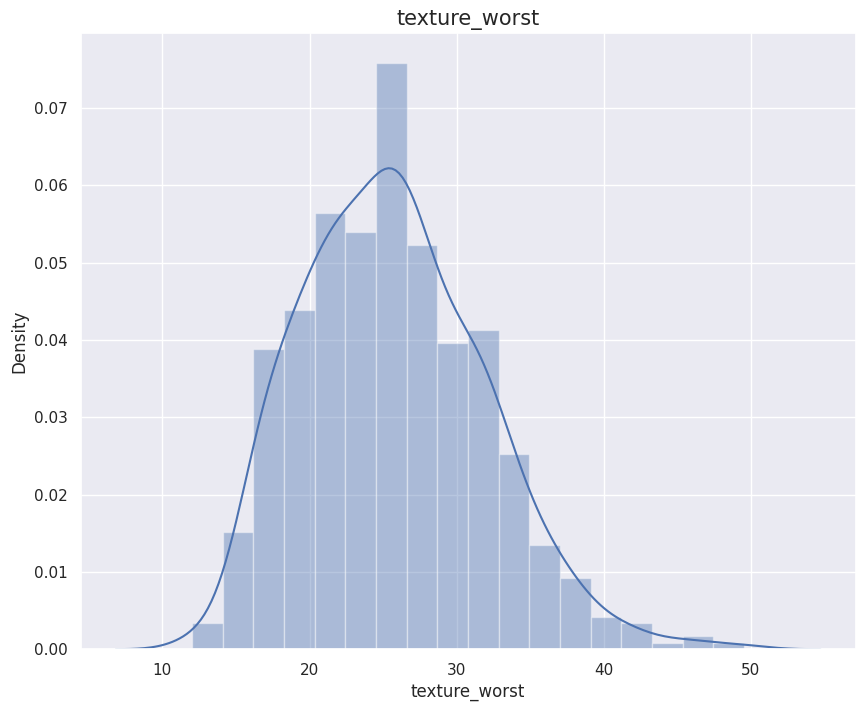

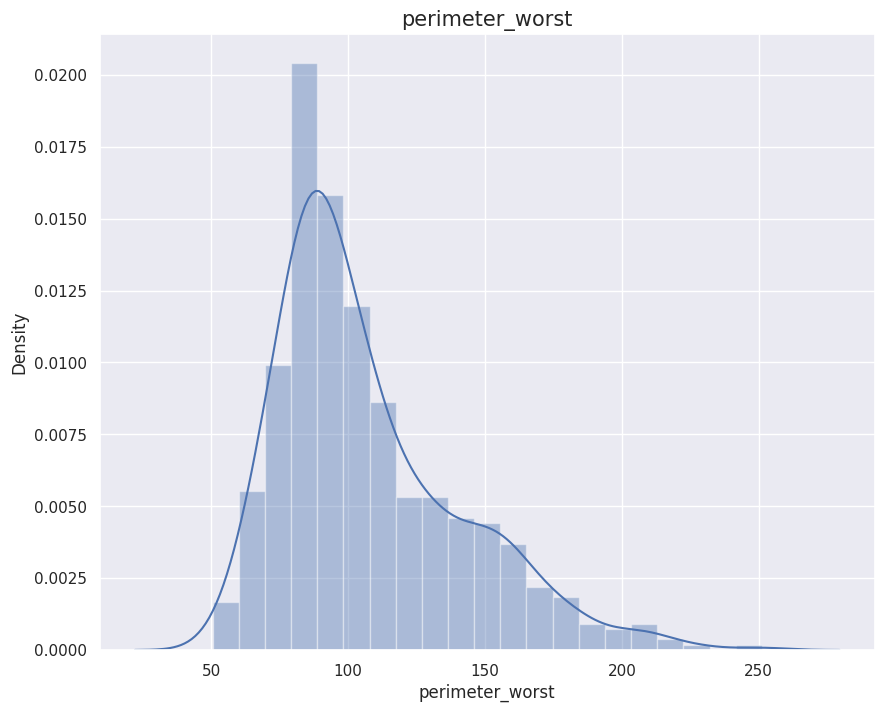

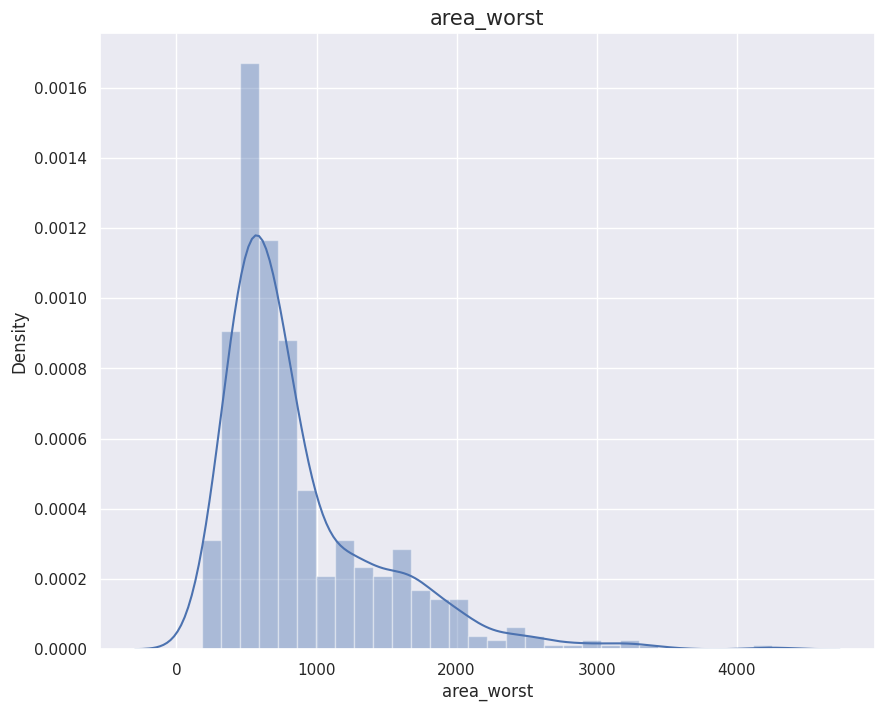

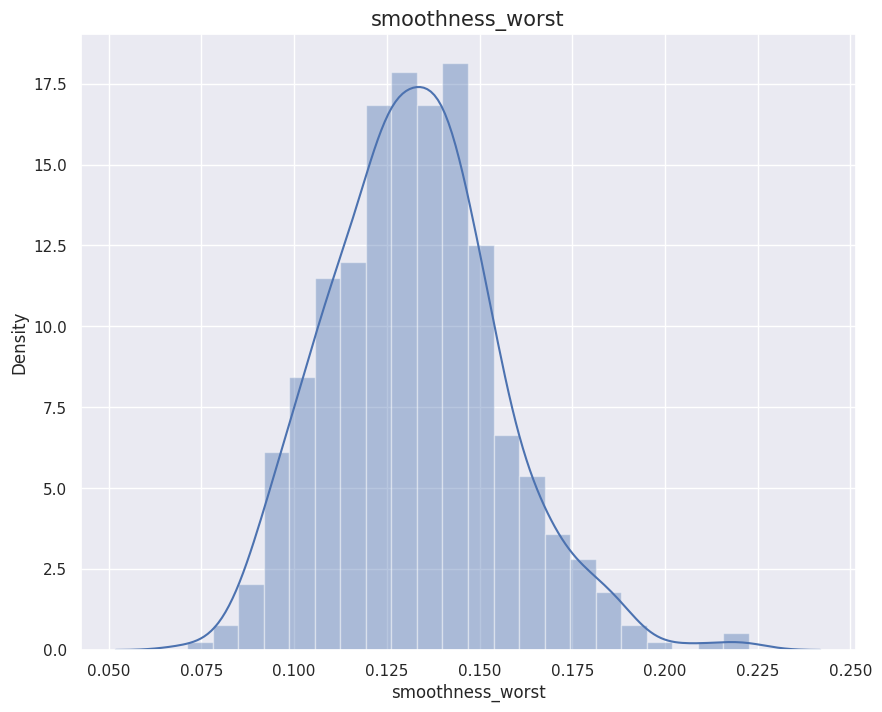

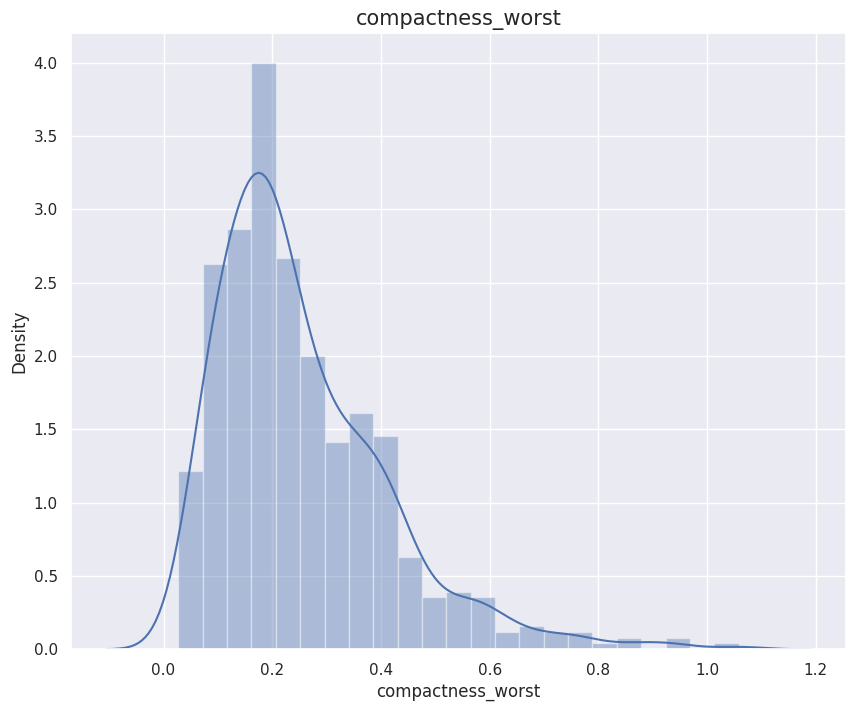

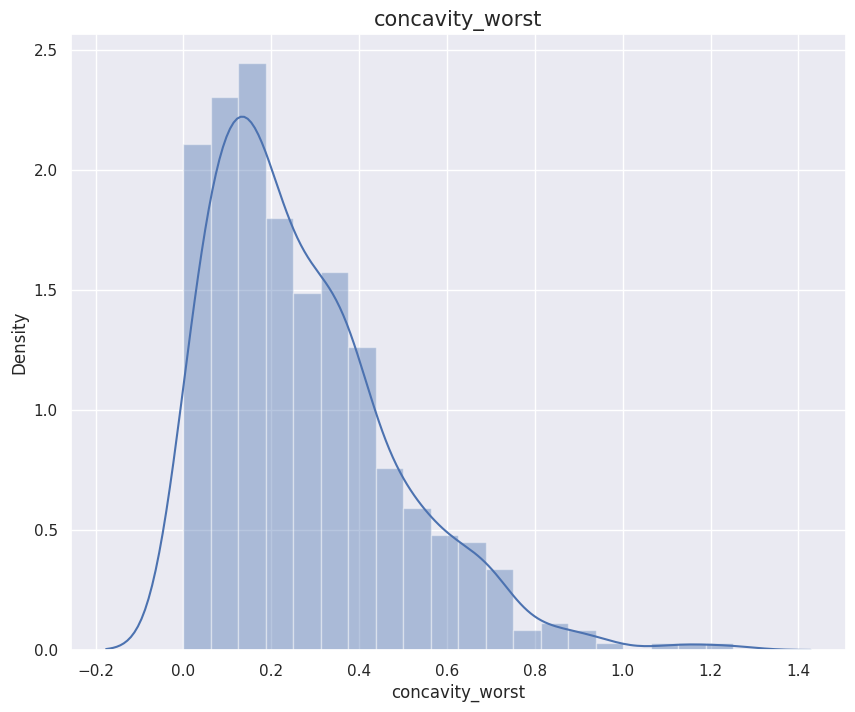

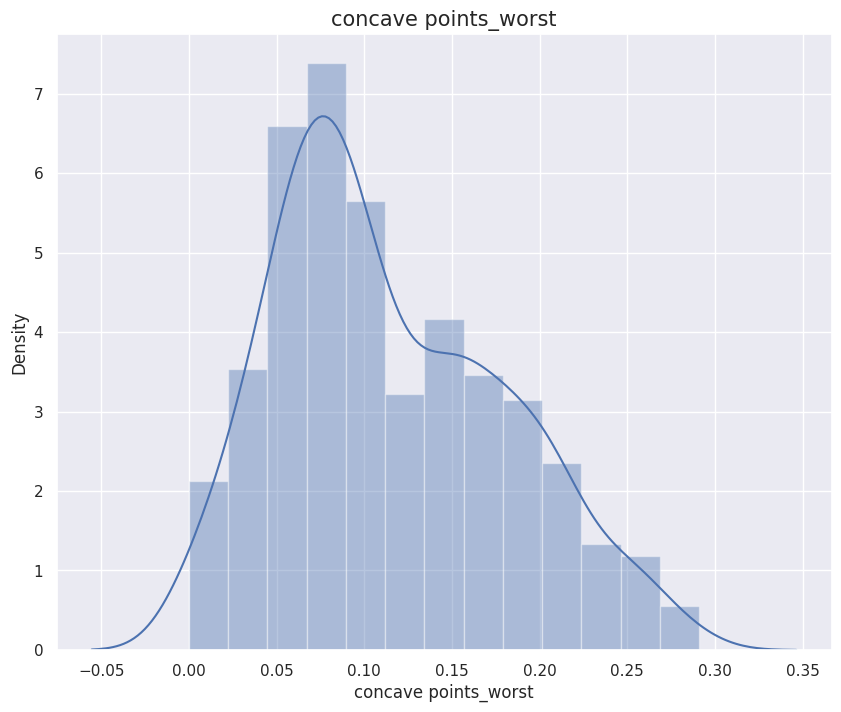

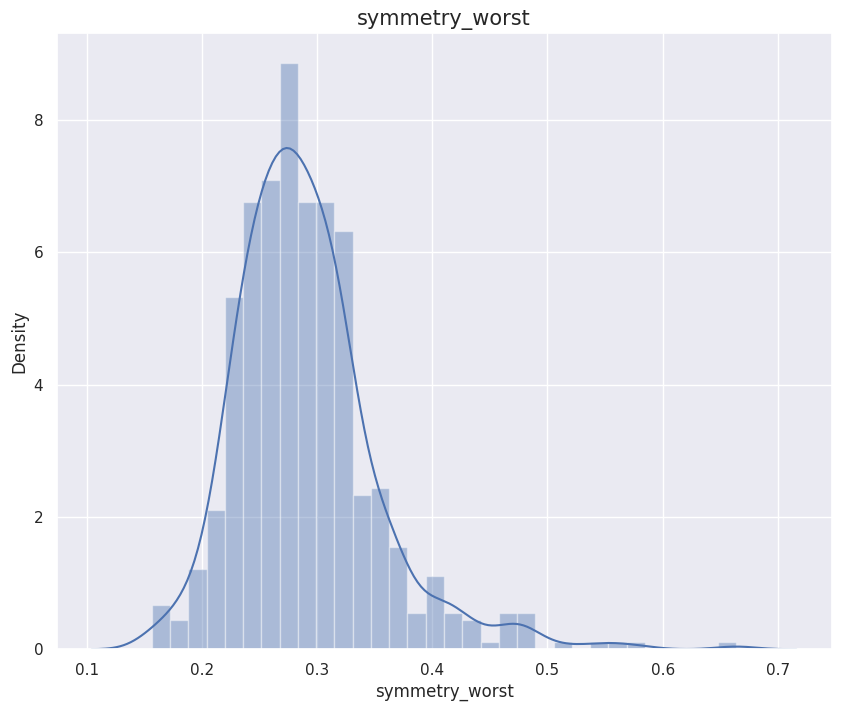

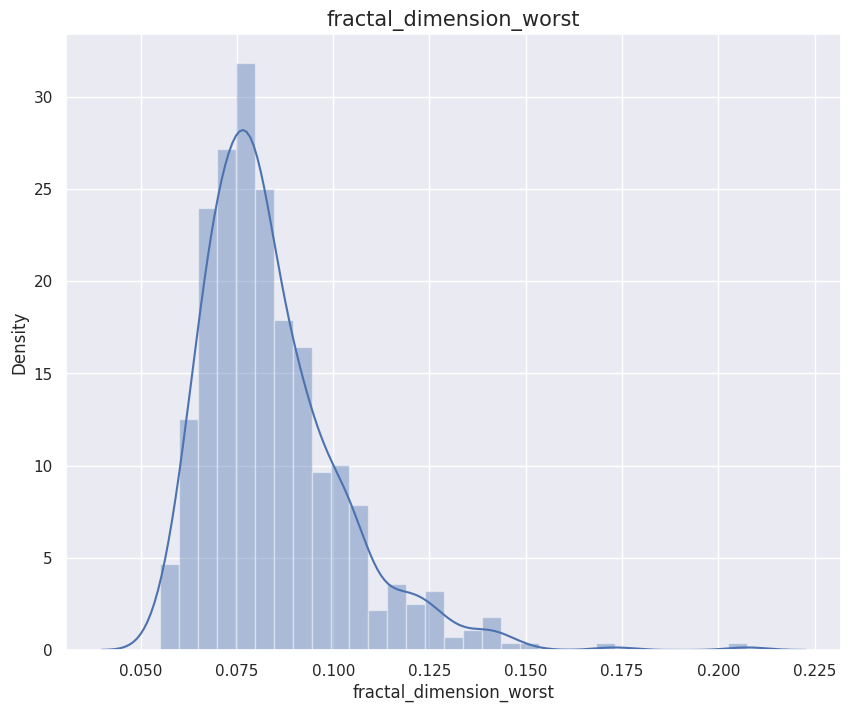

In [21]:
for col in df.drop("diagnosis", axis=1).columns:
    plt.figure(figsize=(10,8))
    sns.distplot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()

Relationship between variables and diagnosis (for visualization)

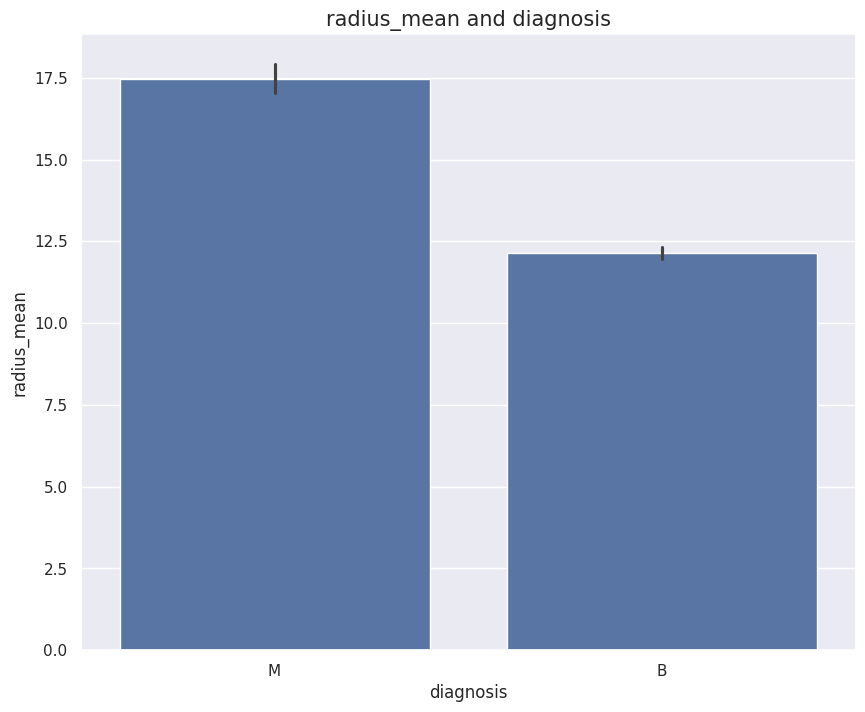

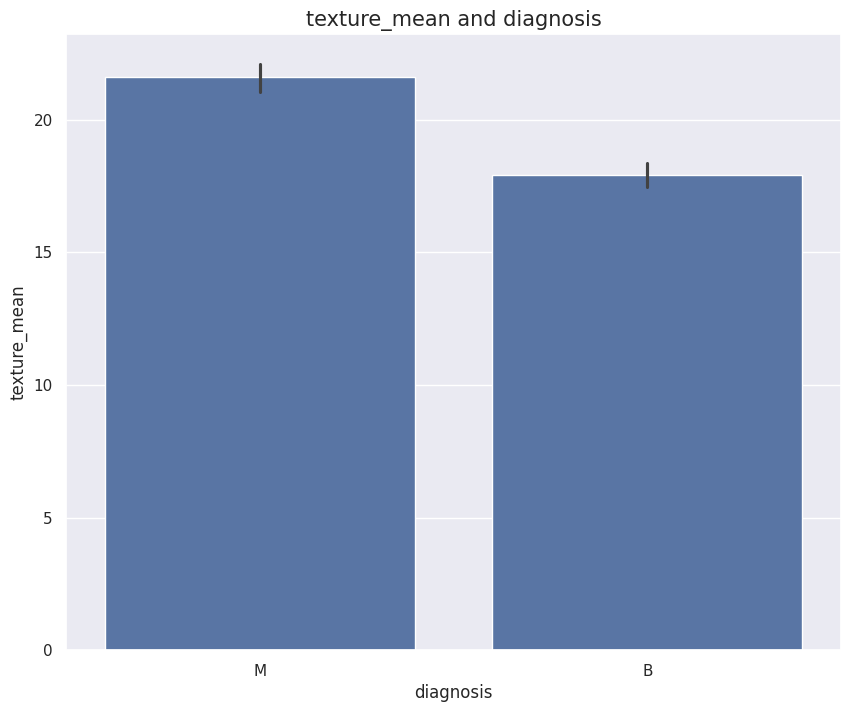

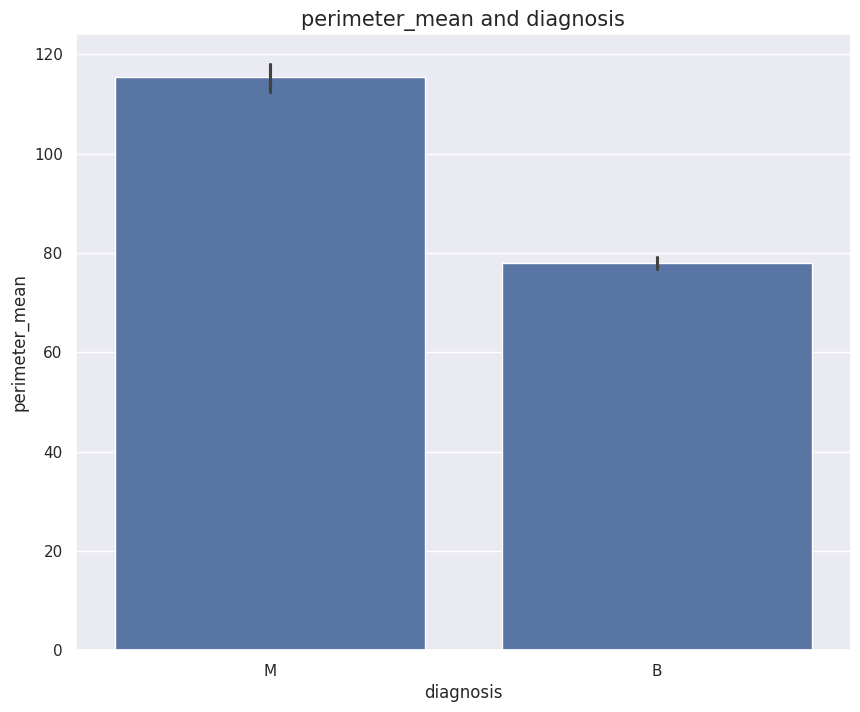

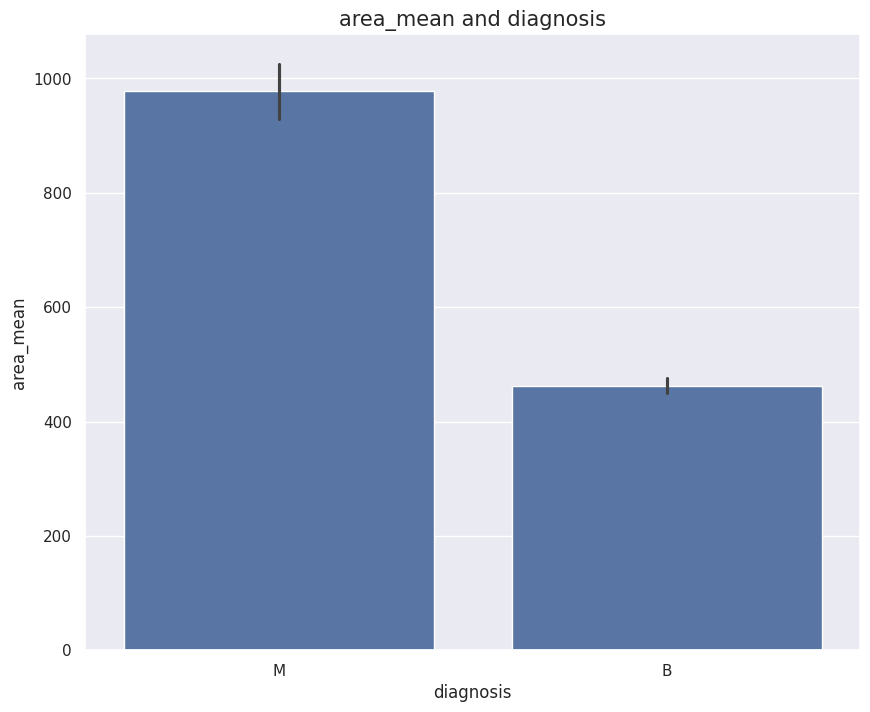

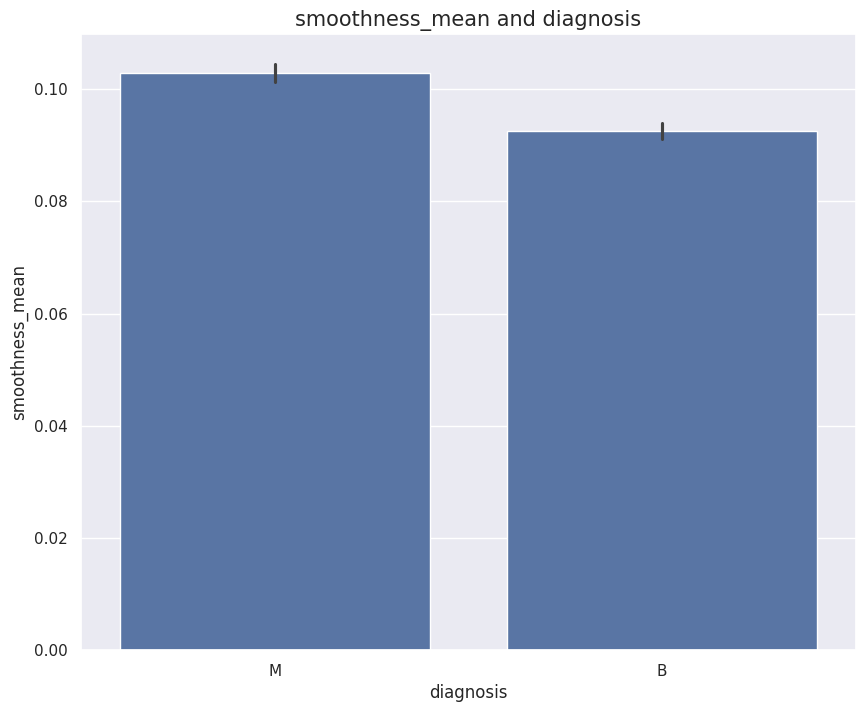

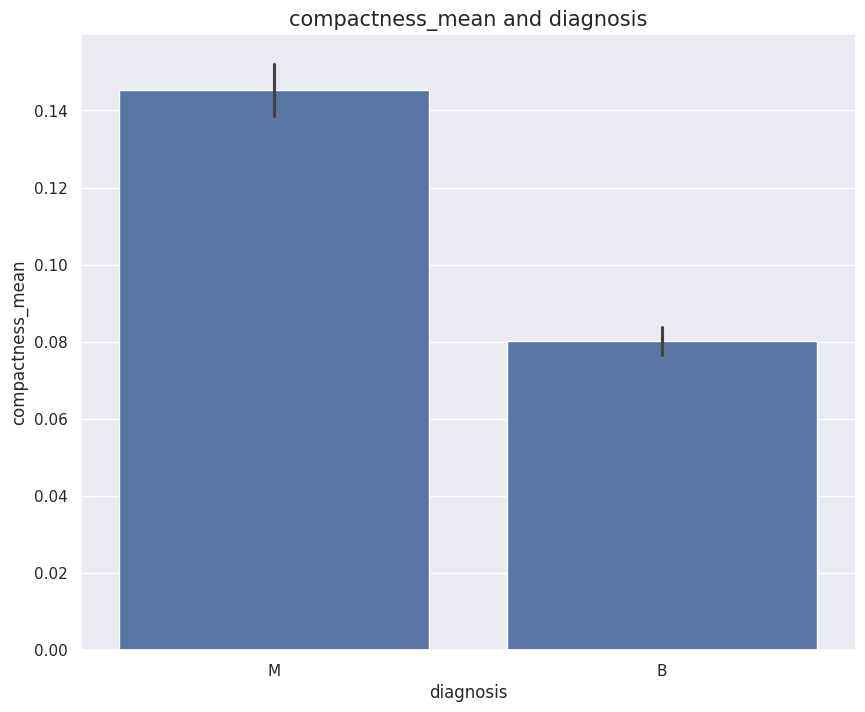

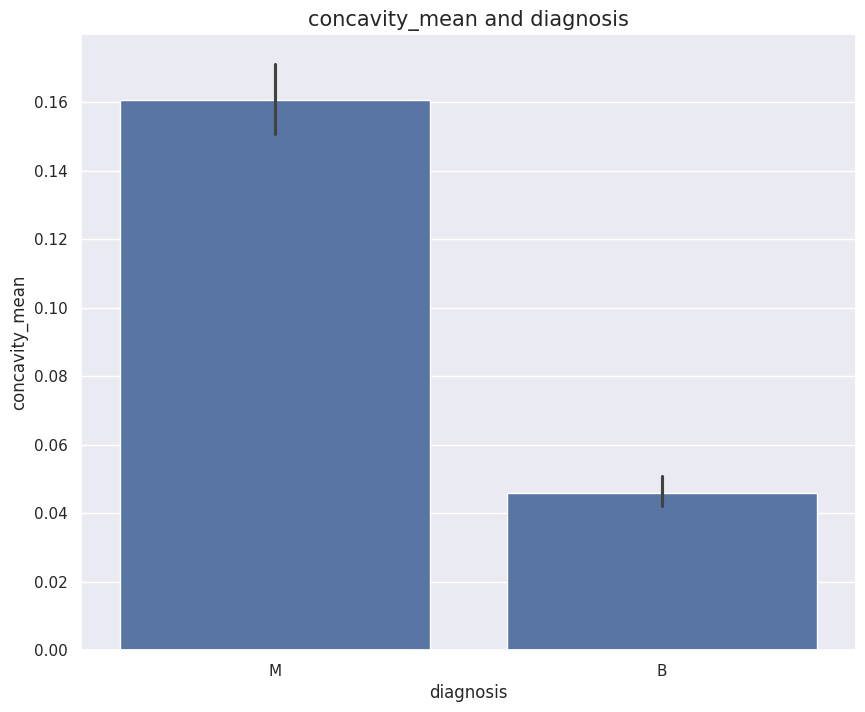

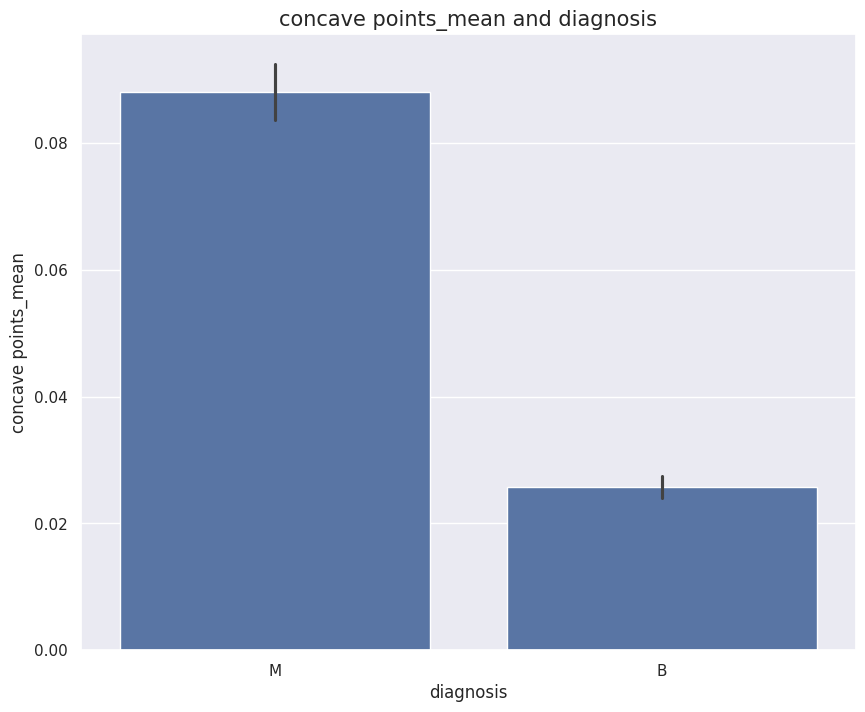

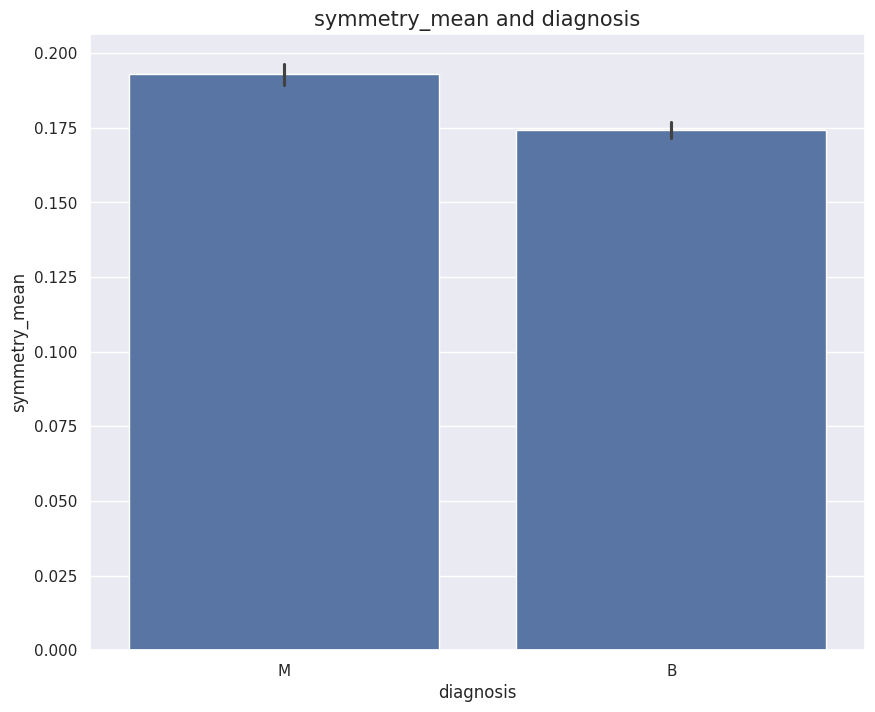

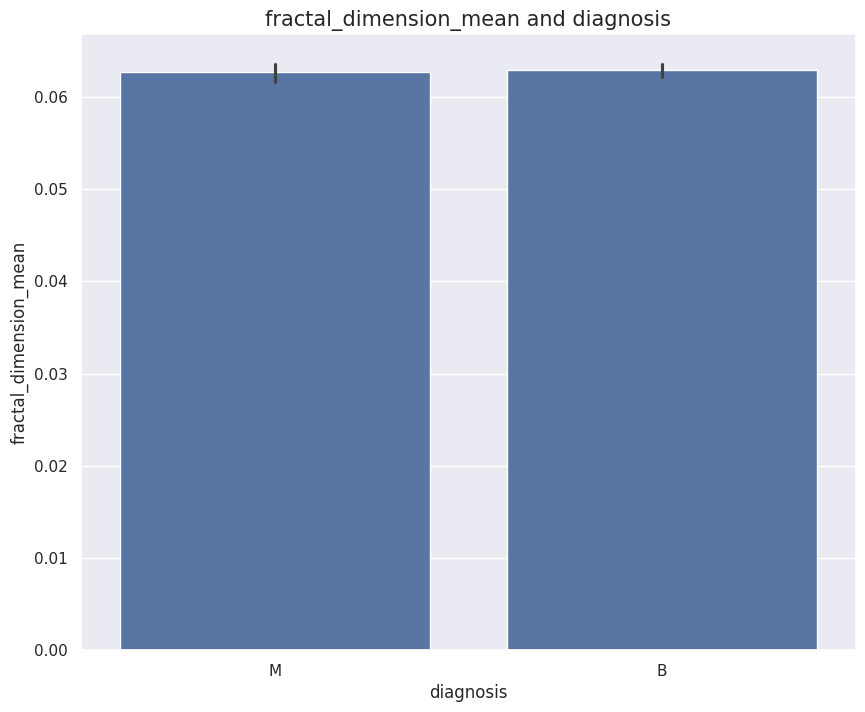

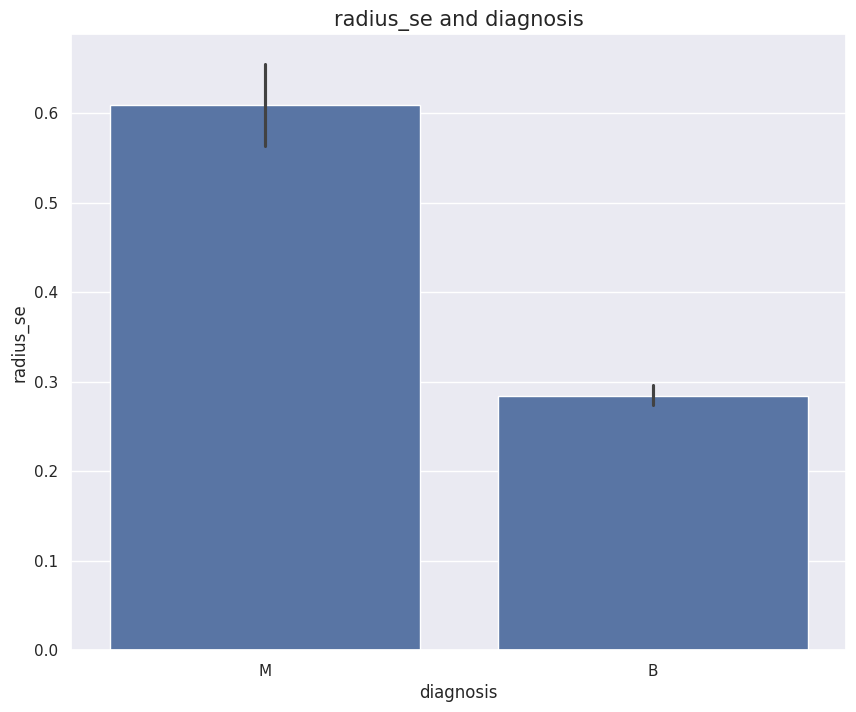

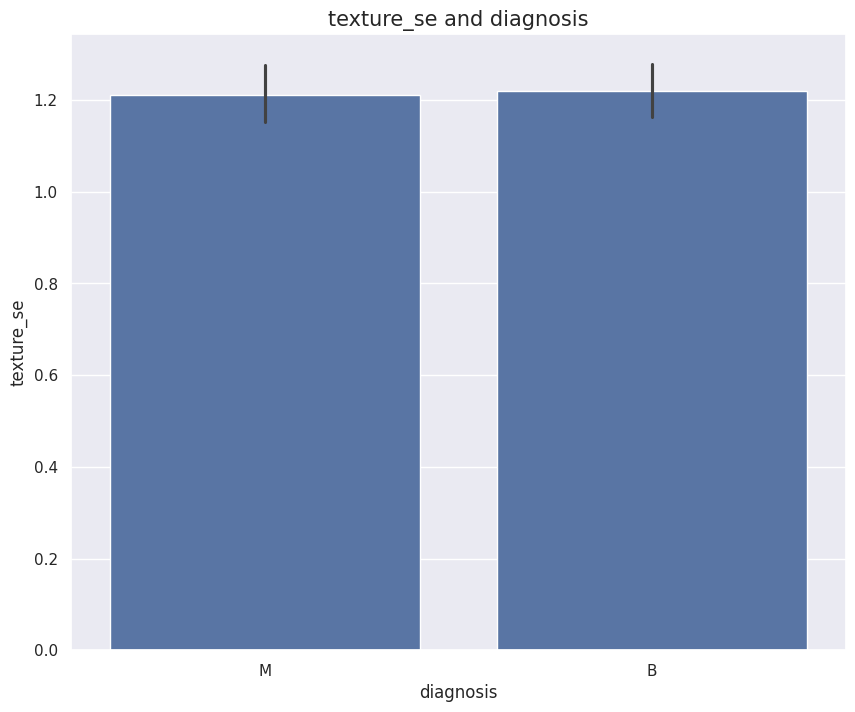

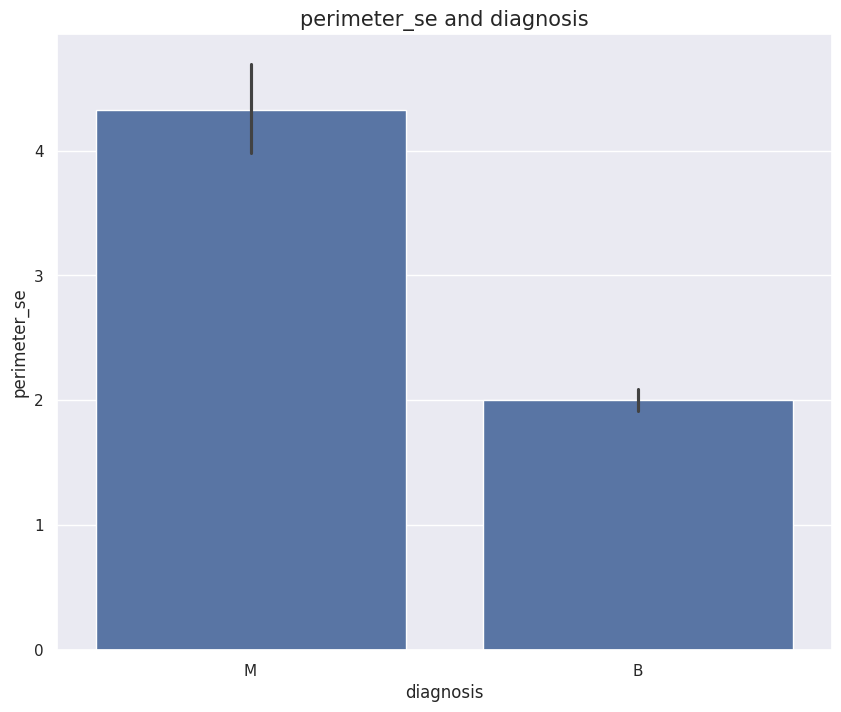

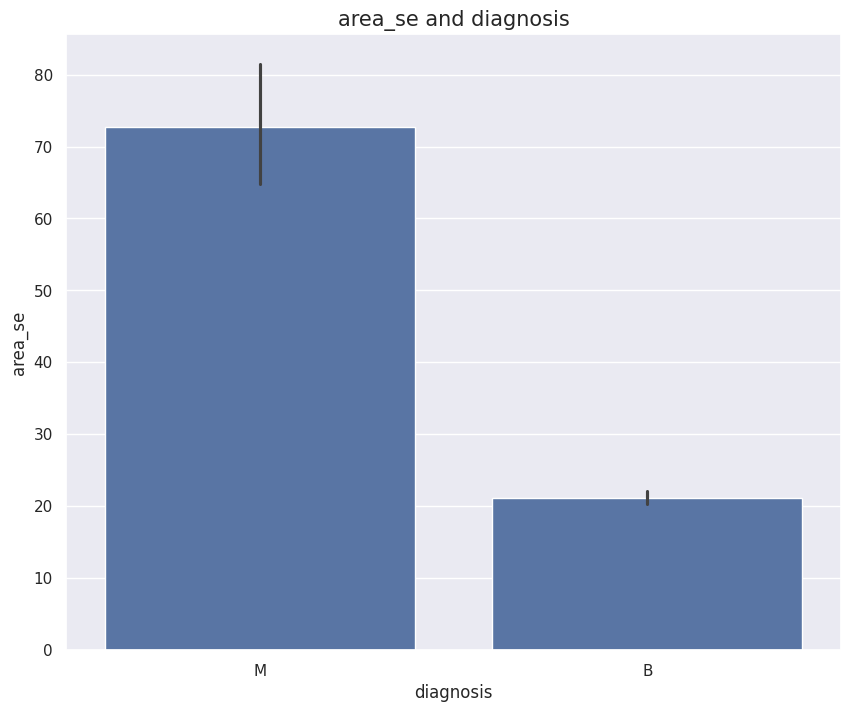

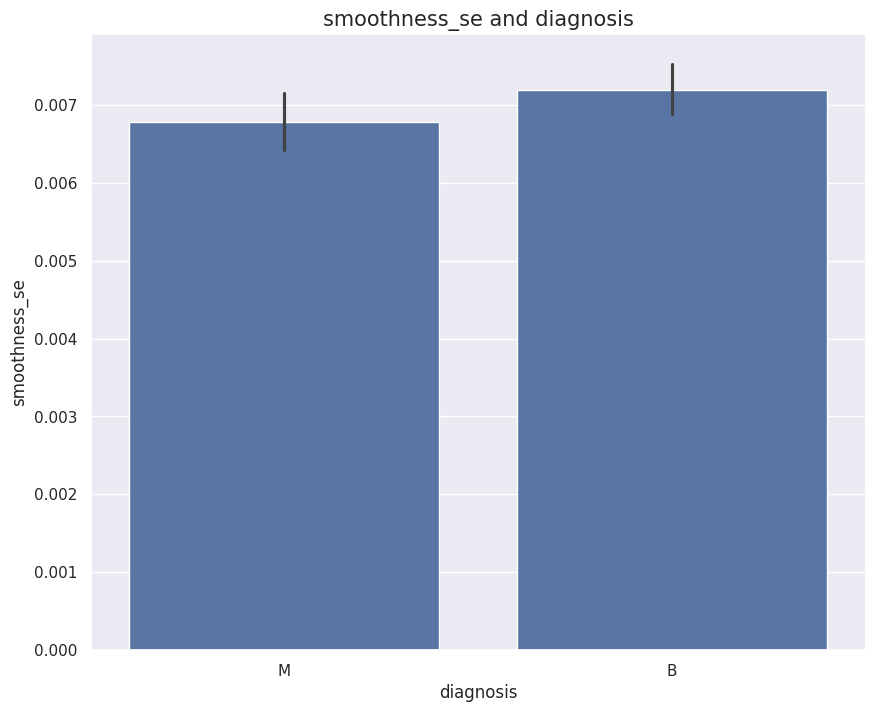

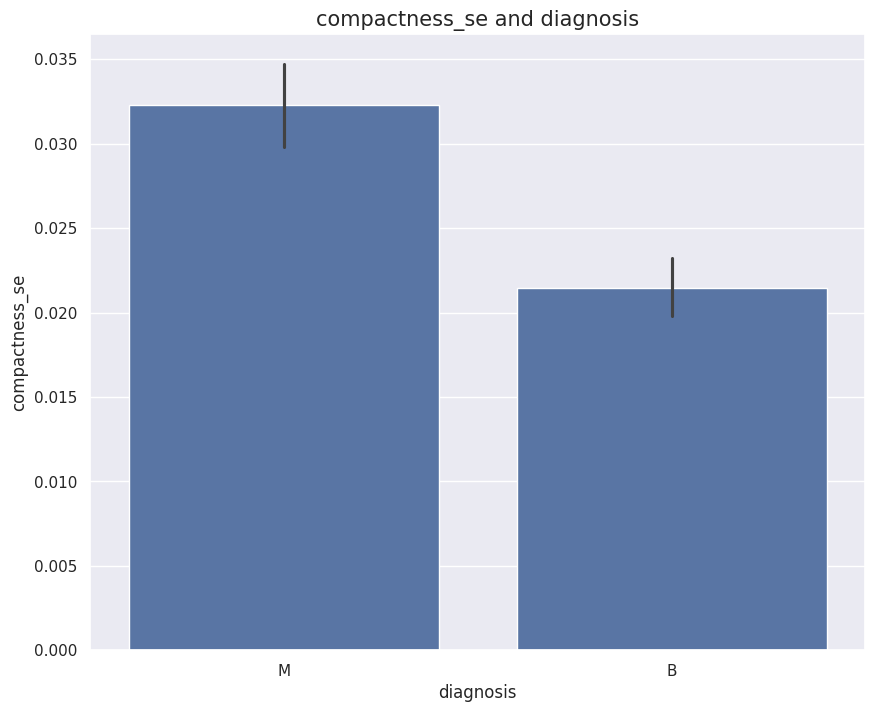

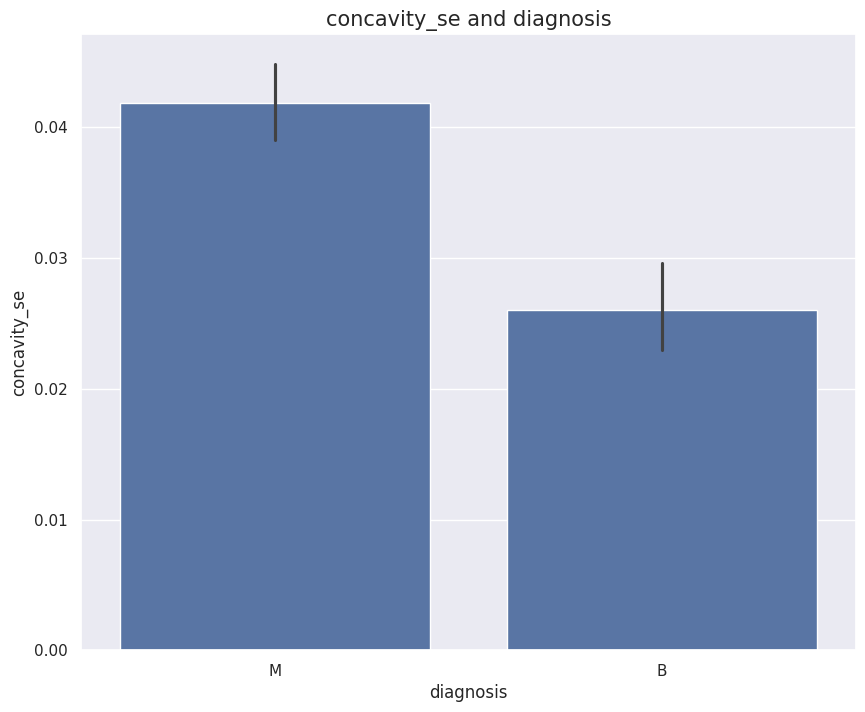

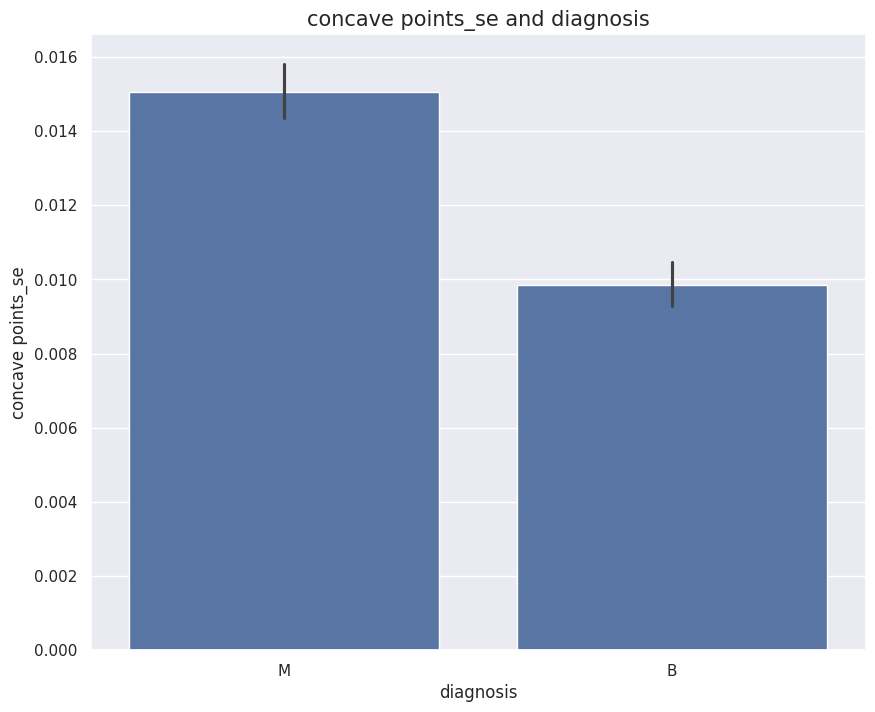

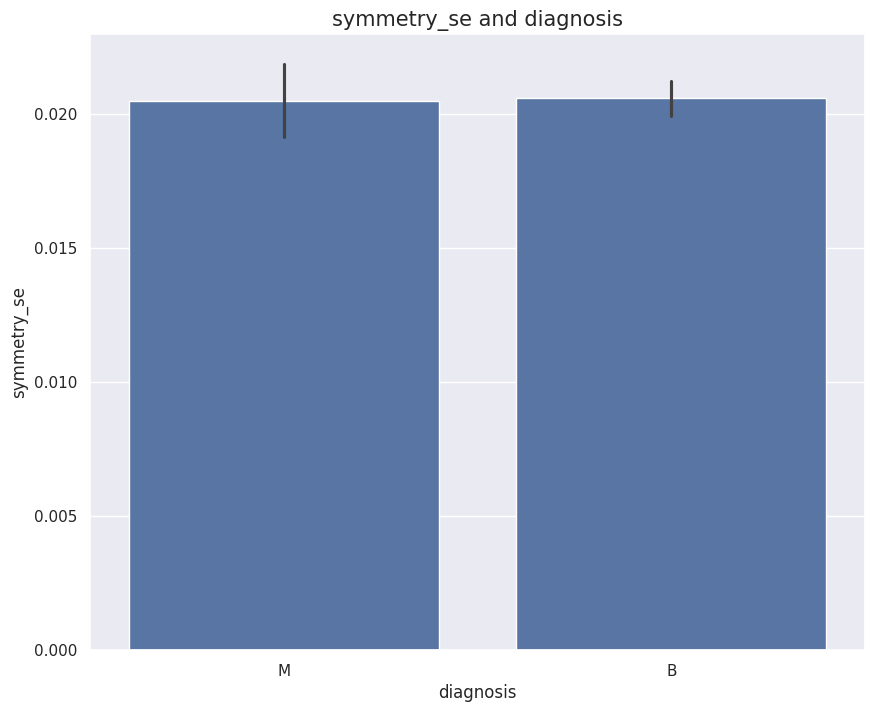

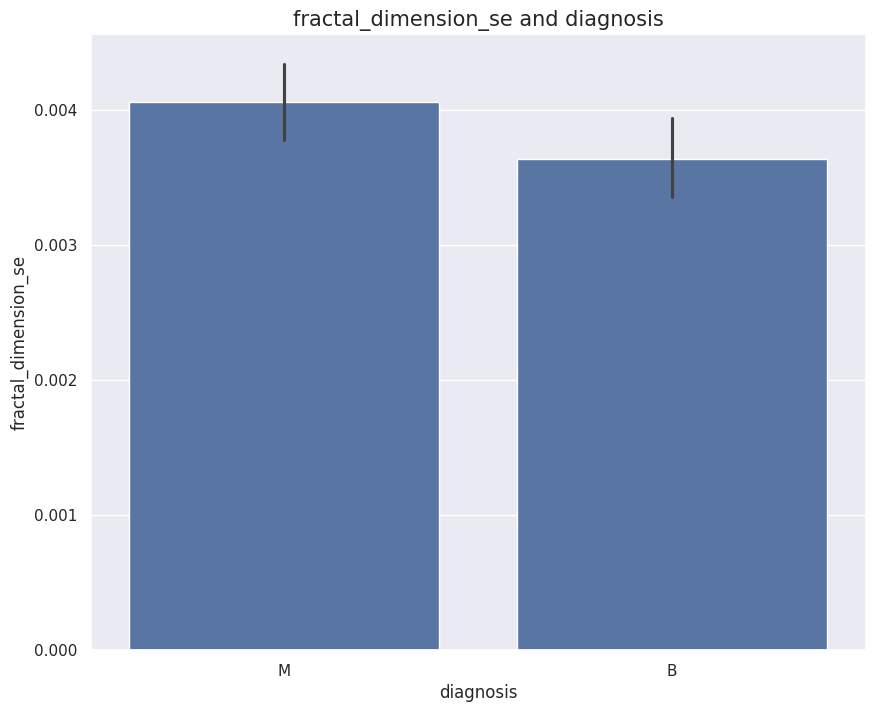

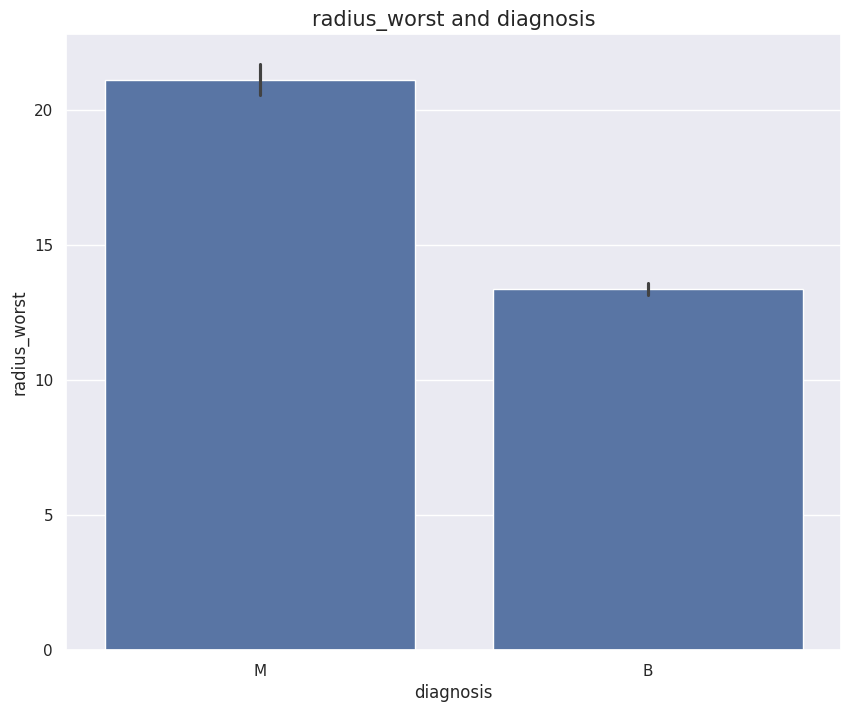

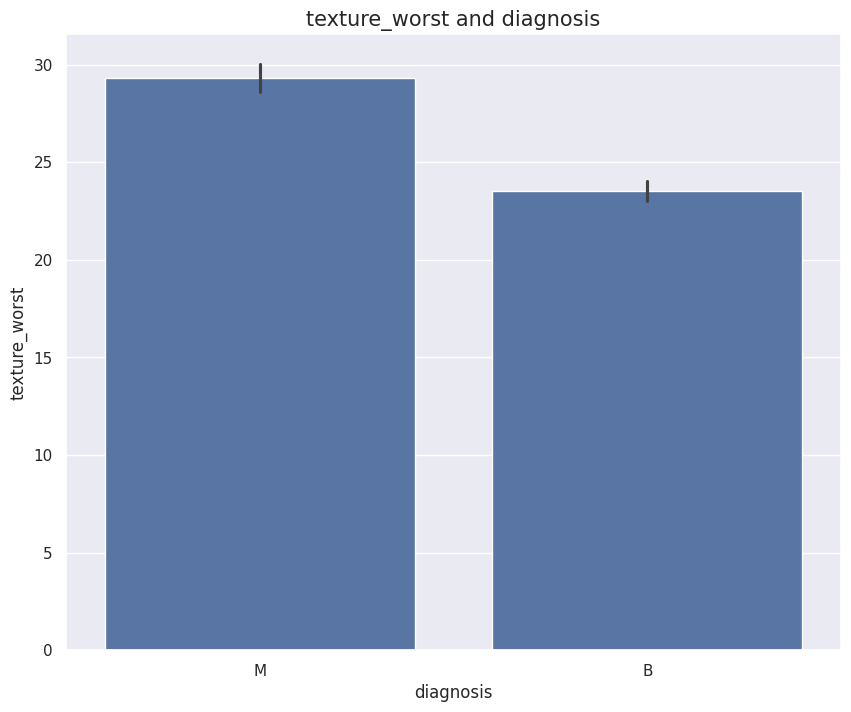

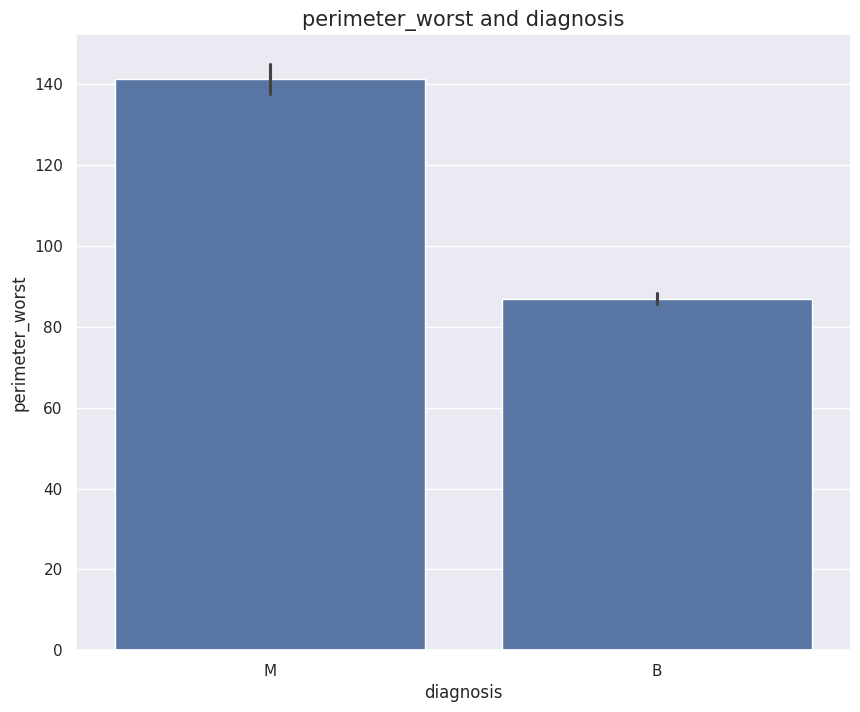

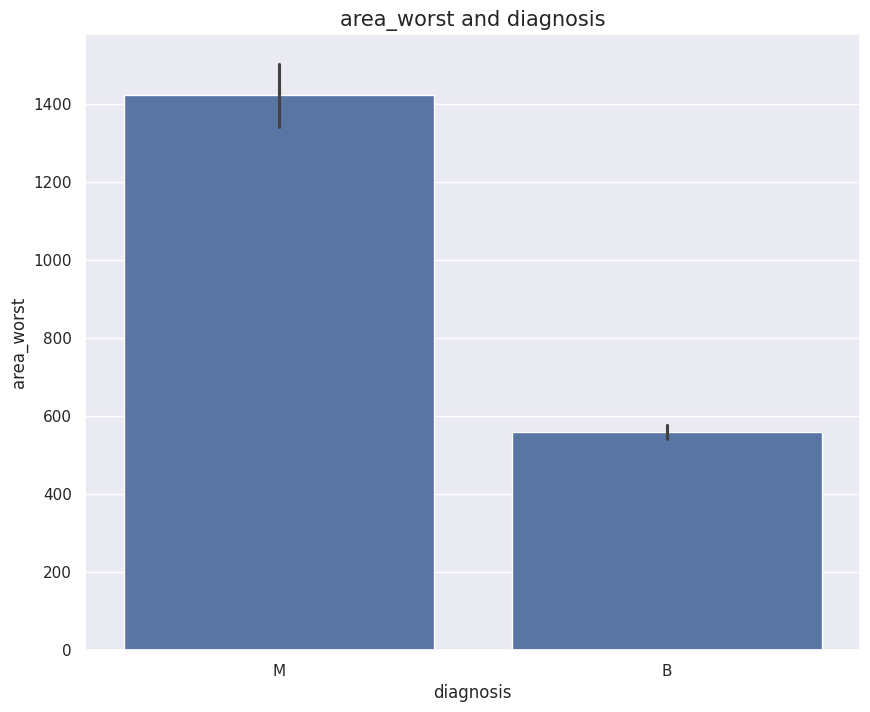

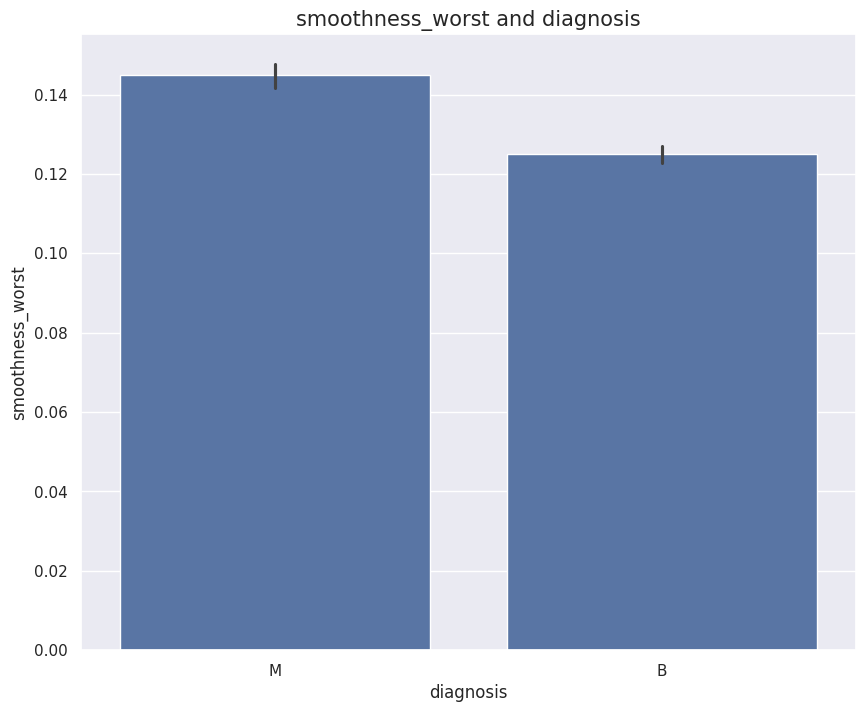

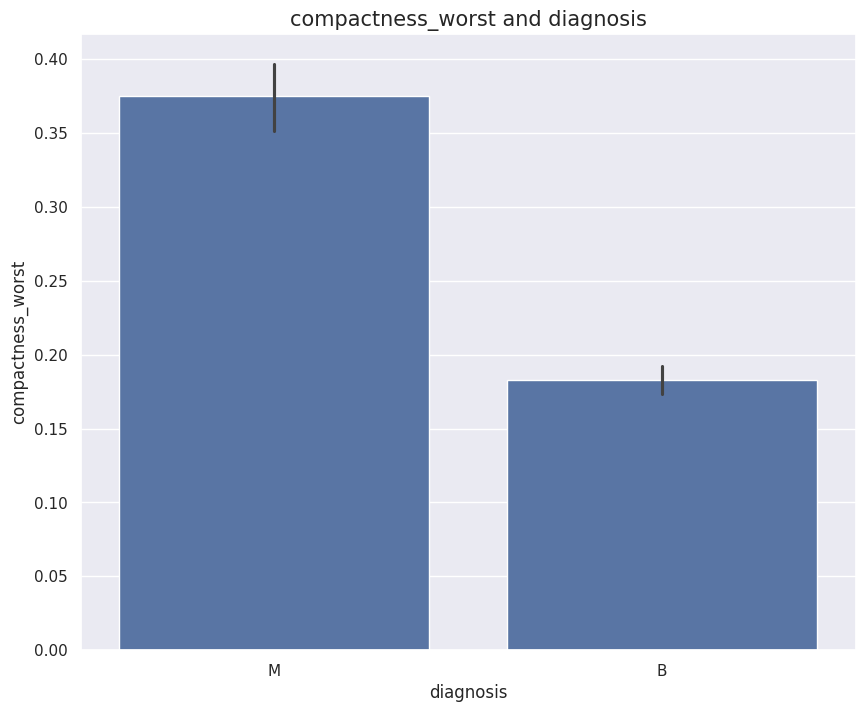

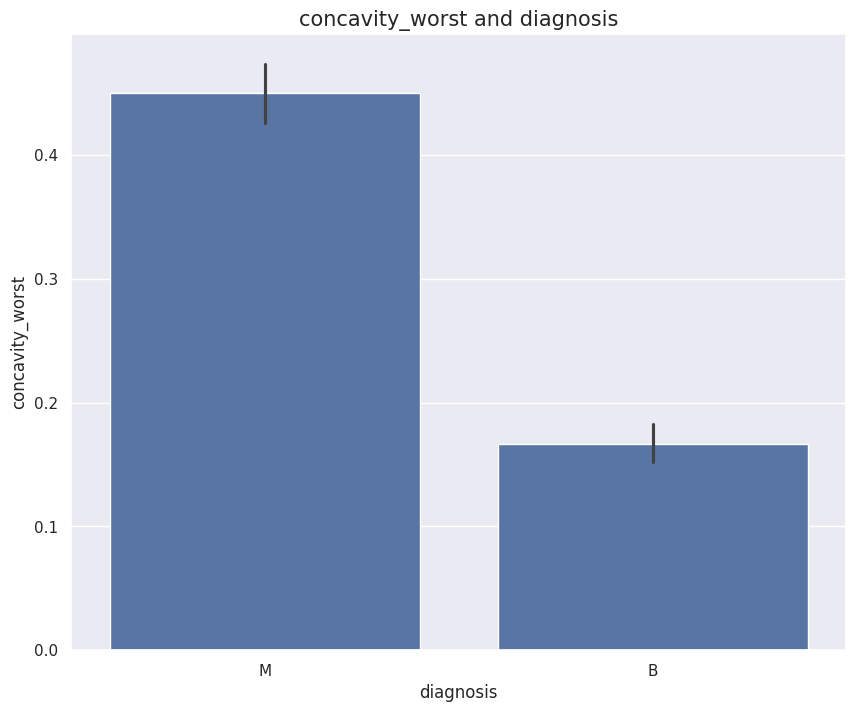

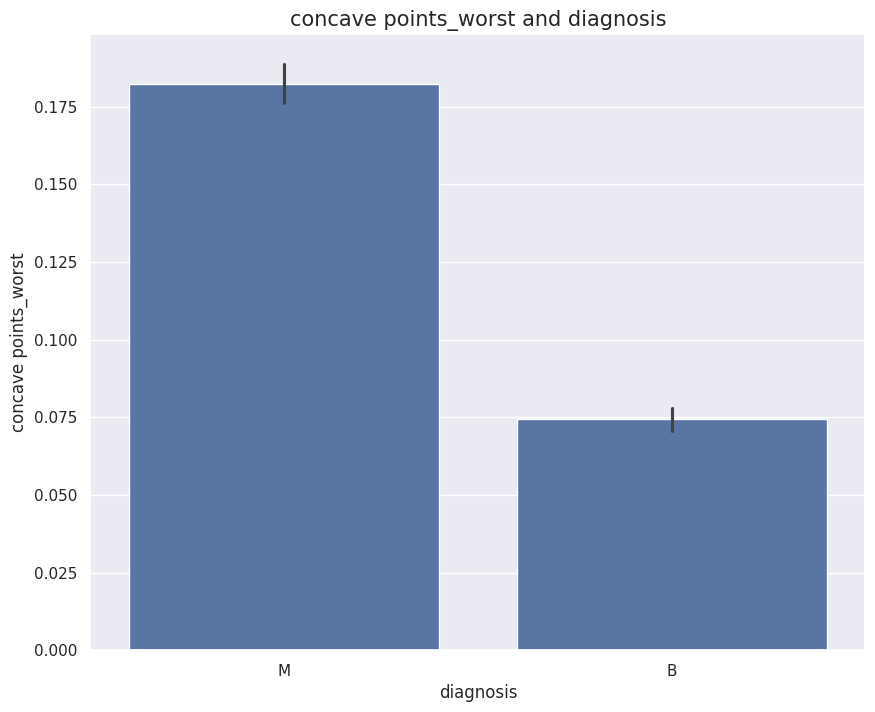

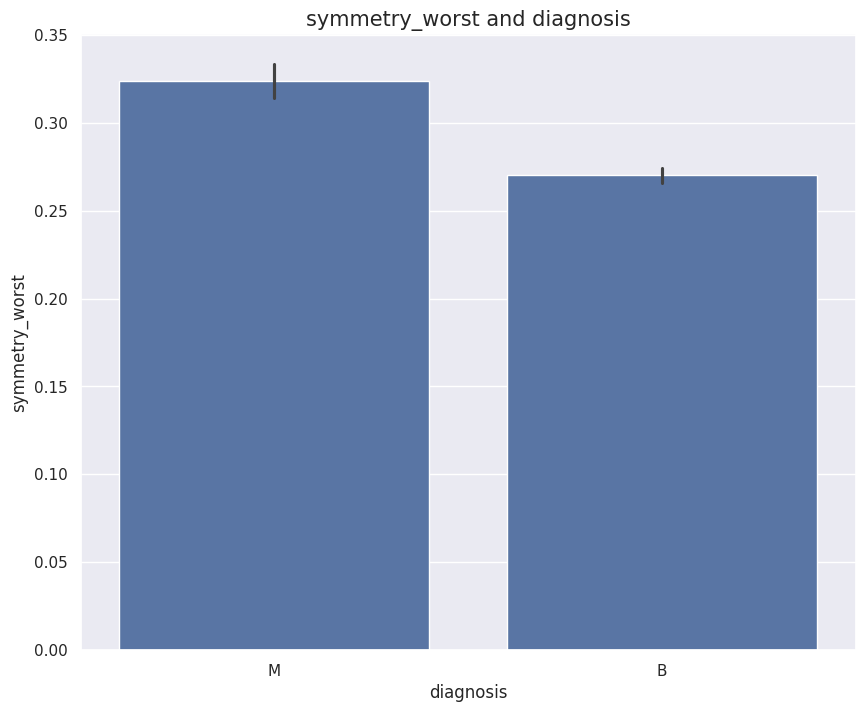

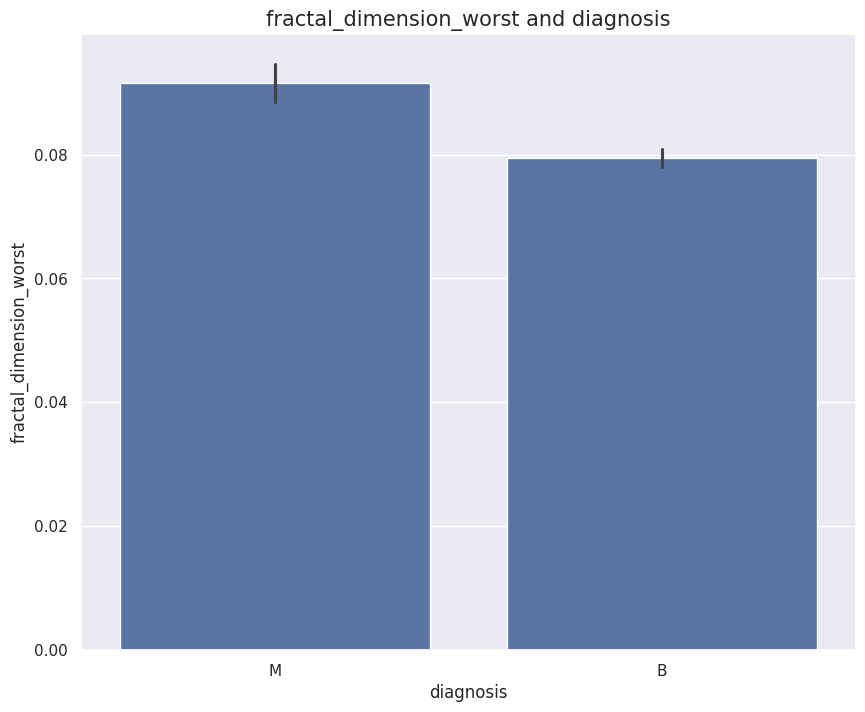

In [24]:
for col in df.drop("diagnosis", axis=1).columns:
    plt.figure(figsize=(10,8))
    sns.barplot(x=df["diagnosis"], y=df[col])
    plt.title(f"{col} and diagnosis", size=15)
    plt.show()

HeatMap

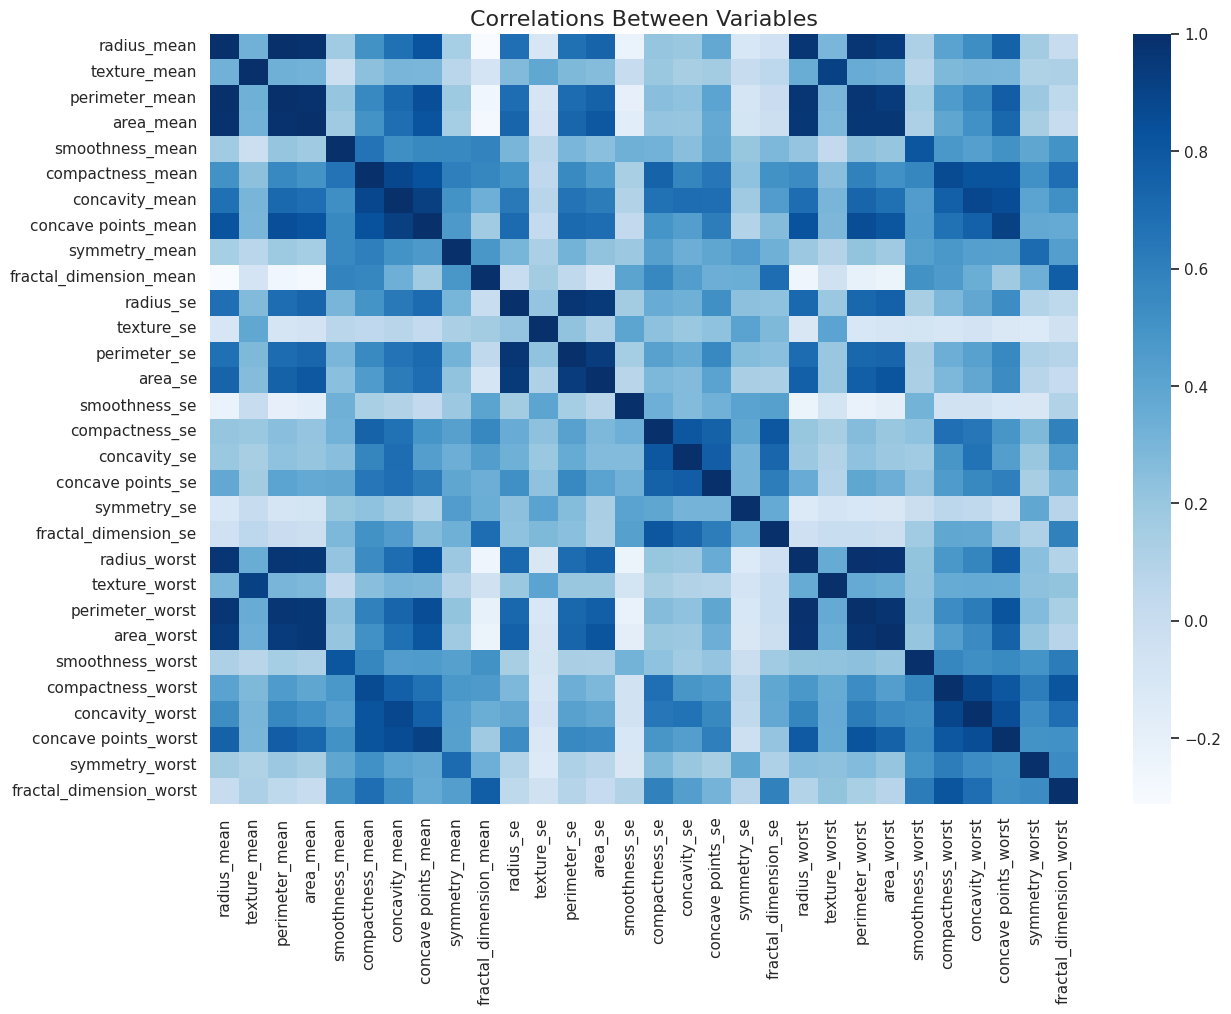

In [26]:
plt.figure(figsize=(14,10))
sns.heatmap(df.drop("diagnosis", axis=1).corr(), cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

X, y Split and Data Standardization

In [36]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"].replace({"B": 0, "M": 1})

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Principal Component Analysis (PCA) for Dimensionality Reduction

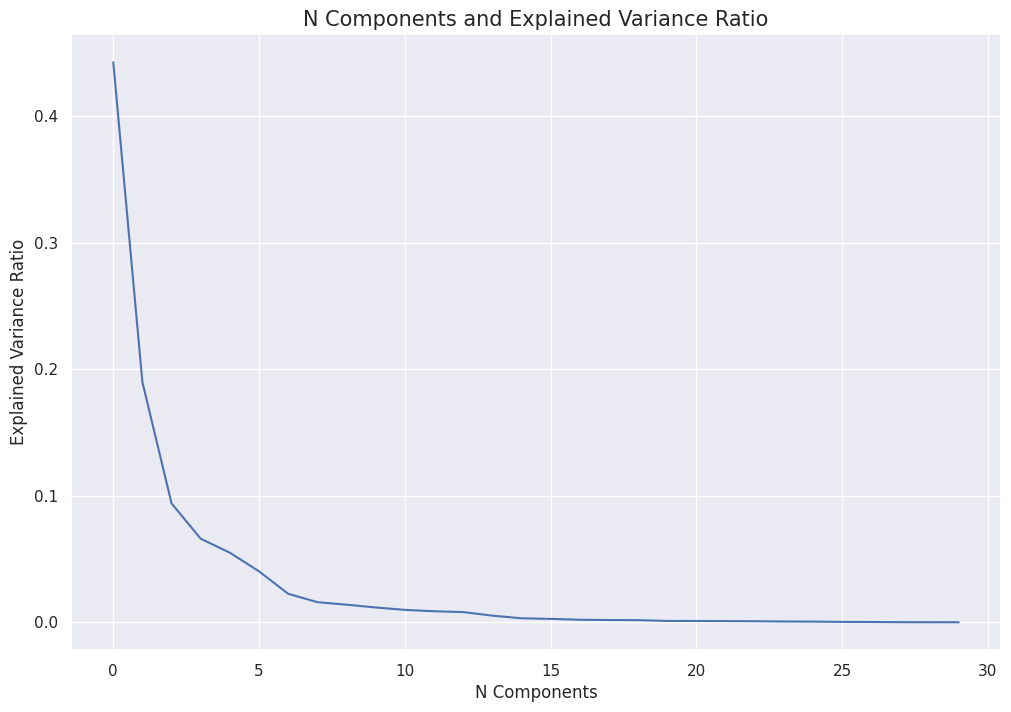

In [38]:
pca = PCA()
pca.fit(X)

plt.figure(figsize=(12,8))
plt.plot(pca.explained_variance_ratio_)
plt.title("N Components and Explained Variance Ratio", size=15)
plt.xlabel("N Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

Here, first 5 components hold 84% of variance, and first 10 components hold 95% of variance. Here, we will take the first 10 components only.

In [32]:
# pca = PCA(n_components = 5)
# X = pca.fit_transform(X)

In [33]:
# pca.explained_variance_ratio_.sum()

np.float64(0.8473427431680725)

In [39]:
pca = PCA(n_components=10)
X = pca.fit_transform(X)

In [40]:
pca.explained_variance_ratio_.sum()

np.float64(0.9515688143366668)

Split into test and train

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
models = pd.DataFrame(columns=["Model", "Accuracy Score"])

Train basic unoptimized models first.

In [51]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "LogisticRegression", "Accuracy Score": score}
models.loc[len(models)] = new_row

Accuracy Score: 0.9824561403508771


In [52]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "RandomForestClassifier", "Accuracy Score": score}
models.loc[len(models)] = new_row

Accuracy Score: 0.9590643274853801


In [53]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "GradientBoostingClassifier", "Accuracy Score": score}
models.loc[len(models)] = new_row

Accuracy Score: 0.9766081871345029


In [54]:
svc = SVC()
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "SVC", "Accuracy Score": score}
models.loc[len(models)] = new_row

Accuracy Score: 0.9649122807017544


In [55]:
models.sort_values(by="Accuracy Score", ascending=False)

Model  Accuracy Score
0          LogisticRegression        0.982456
2  GradientBoostingClassifier        0.976608
3                         SVC        0.964912
1      RandomForestClassifier        0.959064

Here, Logistic Regression did best

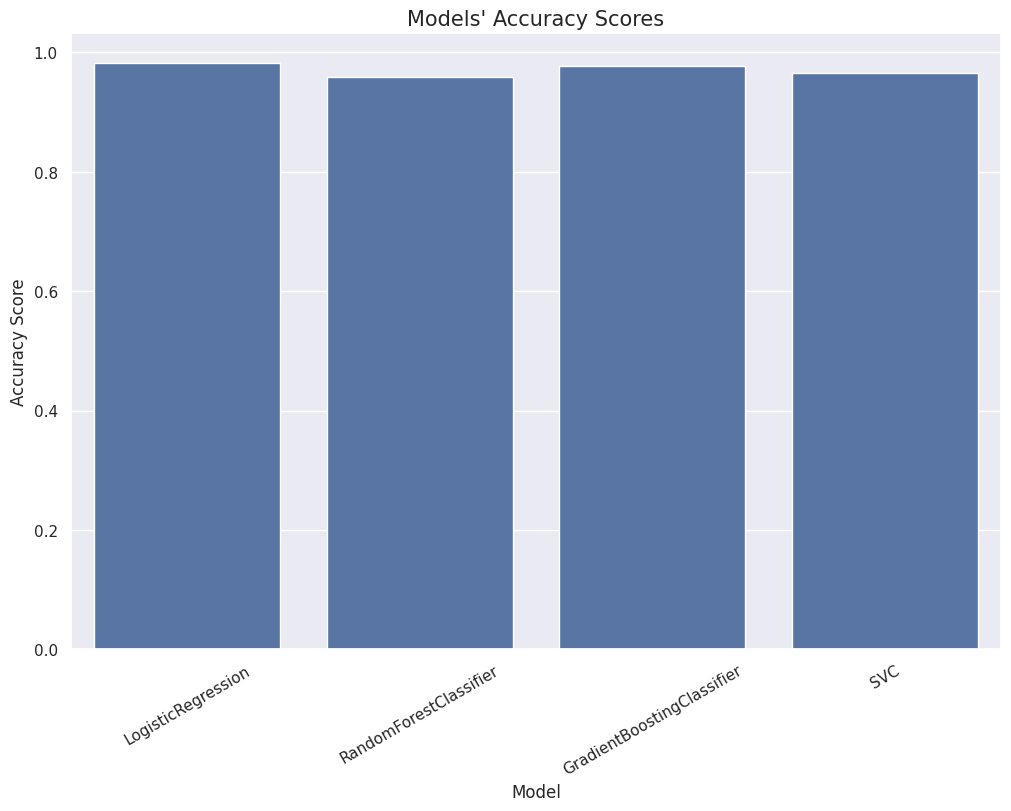

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["Accuracy Score"])
plt.title("Models' Accuracy Scores", size=15)
plt.xticks(rotation=30)
plt.show()

Function for ROC AUC curve

In [57]:
def visualize_roc_auc_curve(model, model_name):
    pred_prob = model.predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

    score = roc_auc_score(y_test, pred_prob[:, 1])

    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, linestyle="--", color="orange", label="ROC curve (area = %0.5f)" % score)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")

    plt.title(f"{model_name} ROC Curve", size=15)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", prop={'size': 15})
    plt.show()

Now, to tune hyperparameters of models using GridSearchCV, get their confusion matrix and ROC AUC curve

In [58]:
tuned_models = pd.DataFrame(columns=["Model", "Accuracy Score"])

In [59]:
param_grid_log_reg = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [61]:
log_reg_params = grid_log_reg.best_params_
log_reg = LogisticRegression(**log_reg_params)
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "LogisticRegression", "Accuracy Score": score}
tuned_models.loc[len(tuned_models)] = new_row

Accuracy Score: 0.9941520467836257


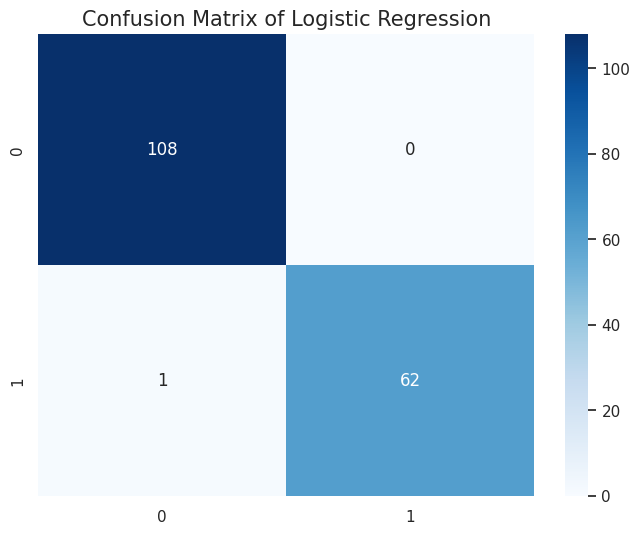

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Logistic Regression", size=15)
plt.show()

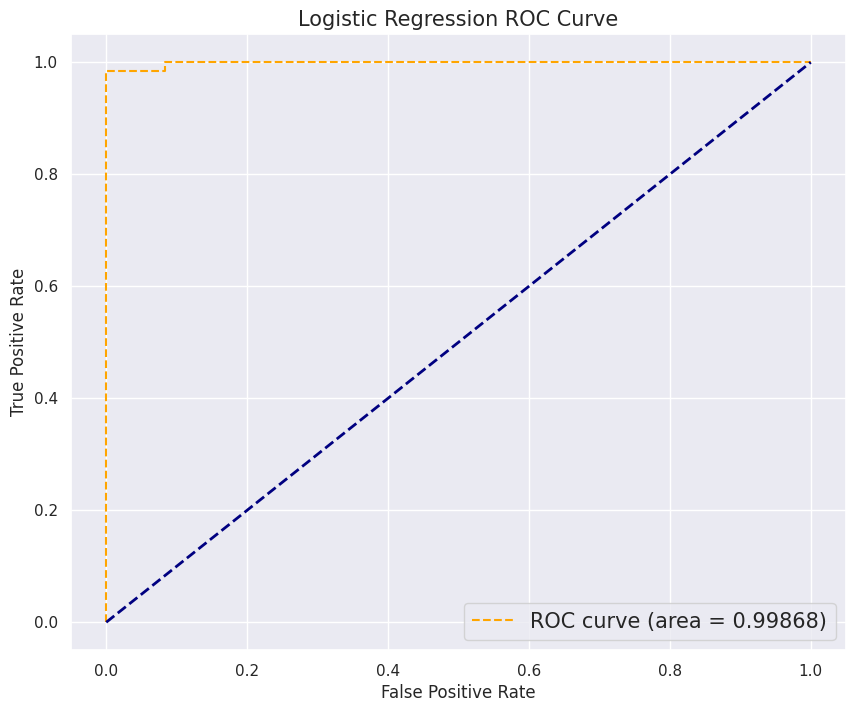

In [65]:
visualize_roc_auc_curve(log_reg, "Logistic Regression")

In [67]:
param_grid_rfc = {"min_samples_split": [2, 3, 5, 10],
                  "min_samples_leaf": [1, 3, 5, 10],
                  "n_estimators" :[100, 200, 500]}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [68]:
rfc_params = grid_rfc.best_params_
rfc = RandomForestClassifier(**rfc_params)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "RandomForestClassifier", "Accuracy Score": score}
tuned_models.loc[len(tuned_models)] = new_row

Accuracy Score: 0.9532163742690059


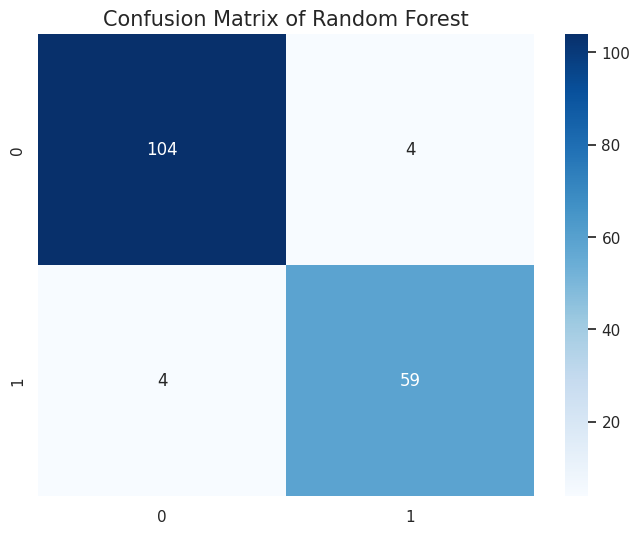

In [69]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of Random Forest", size=15)
plt.show()

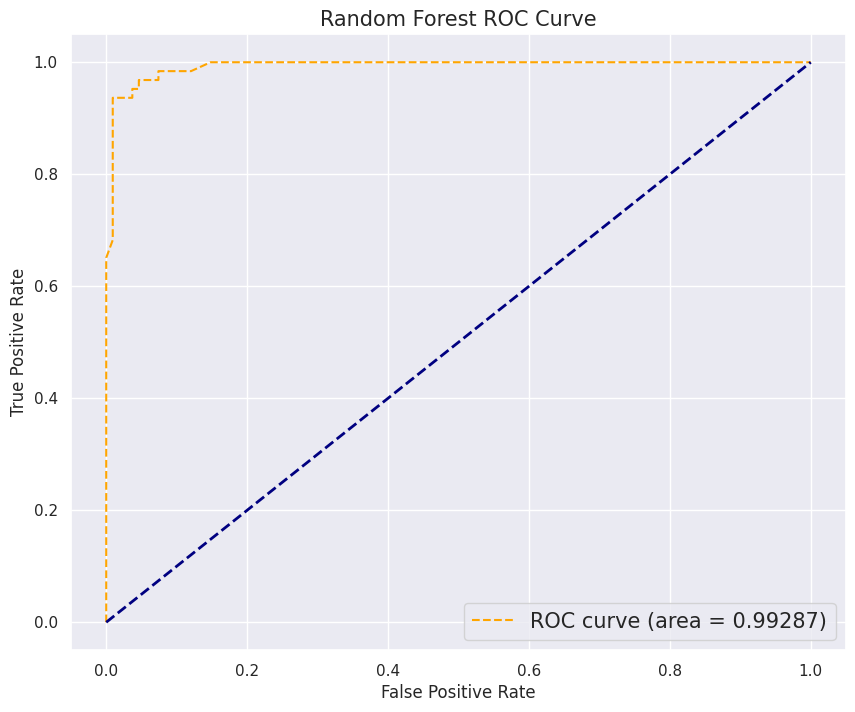

In [70]:
visualize_roc_auc_curve(rfc, "Random Forest")

In [71]:
param_grid_gbc = {'n_estimators' : [100, 200, 500],
                  'learning_rate': [0.1, 0.05, 0.01],
                  'max_depth': [2, 3, 6],
                  'min_samples_leaf': [1, 2, 5]}

grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid_gbc, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [2, 3, 6], 'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [72]:
gbc_params = grid_gbc.best_params_
gbc = GradientBoostingClassifier(**gbc_params)
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "GradientBoostingClassifier", "Accuracy Score": score}
tuned_models.loc[len(tuned_models)] = new_row

Accuracy Score: 0.9824561403508771


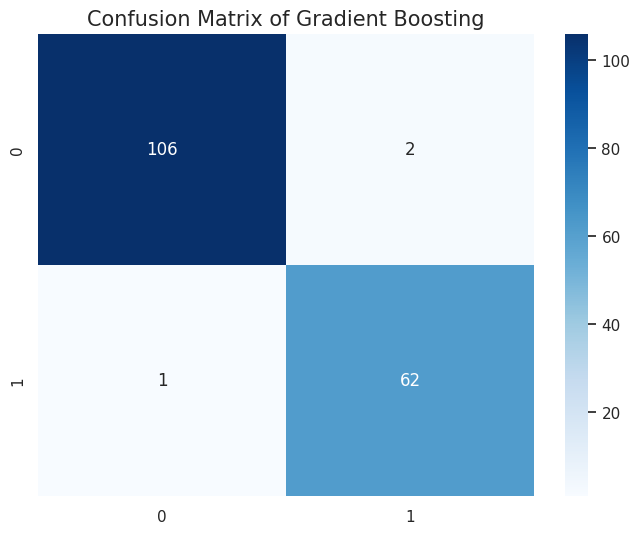

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of Gradient Boosting", size=15)
plt.show()

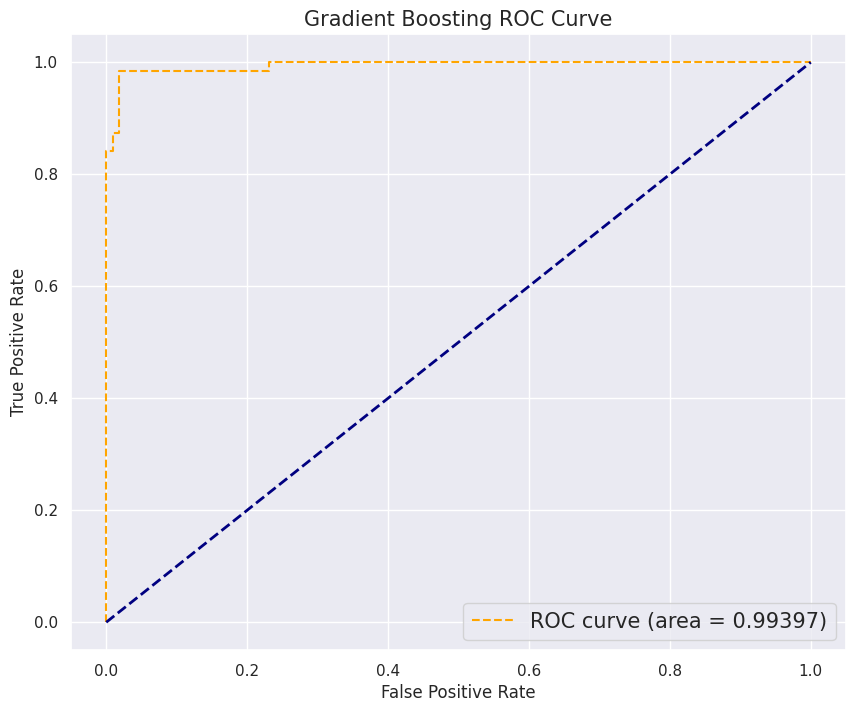

In [74]:
visualize_roc_auc_curve(gbc, "Gradient Boosting")

In [75]:
param_grid_svc = {'gamma': [ 0.001, 0.01, 0.1, 1, 10],
                  'C': [1, 10, 50, 100, 200, 300, 500, 1000]}

grid_svc = GridSearchCV(SVC(), param_grid_svc, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 500, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [76]:
svc_params = grid_svc.best_params_
svc = SVC(**svc_params)
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "SVC", "Accuracy Score": score}
tuned_models.loc[len(tuned_models)] = new_row

Accuracy Score: 0.9824561403508771


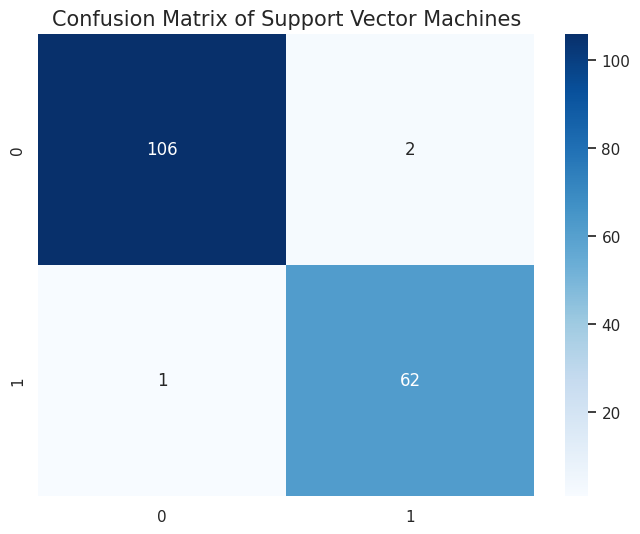

In [77]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of Support Vector Machines", size=15)
plt.show()

In [78]:
tuned_models.sort_values(by="Accuracy Score", ascending=False)

Model  Accuracy Score
0          LogisticRegression        0.994152
2  GradientBoostingClassifier        0.982456
3                         SVC        0.982456
1      RandomForestClassifier        0.953216

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=tuned_models["Model"], y=tuned_models["Accuracy Score"])
plt.title("Models' Accuracy Scores After Hyperparameter Tuning", size=15)
plt.xticks(rotation=30)
plt.show()